<a href="https://colab.research.google.com/github/oghzzang/AMC_NGS1/blob/master/03_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **How to Use This Google Colab**

1. **Set the Runtime Type**: From the top menu, click **Runtime** → **Change runtime type**. Ensure the **Runtime type** is set to **R**.

2. **Connect to the Runtime**: Click the **Connect** button in the top-right corner to establish a connection. Once connected, you are ready to begin the tutorial.

3. **Choose Your Data**: You can run the analysis using the provided dataset or load your own data by following the instructions at the beginning of each section.

# **Setting**

## 분석할 폴더 정하기

R의 경우 google drive와 연결이 안됨. /content/ 에서 실행함.

In [1]:
getwd() # bash의 pwd와 같은 역할

[1] "/content"

In [2]:
dir.create("03_R")
setwd("/content/03_R")

## install packages

패키지 설치 여부 확인

In [9]:
library(maftools)

- R에서 packages를 설치하는 방법 (주로 사용되는 세 가지 방법)

  - 방법1. install.pacakges("PKGNAME") : cran에 등록된 것만 사용 가능함.

  - 방법2. Bioconductor를 이용하는 방법

  - 방법3. github에서 source code 를 직접 다운받은 후 설치하는 방법

- R에서 package가 설치되었는지 확인하는 방법
  - `library(PKGNAME)`


---



- 방법 1.  `install.pacakges("PKGNAME")` : cran에 등록된 것만 사용 가능함.

  - https://cran.r-project.org/web/packages/ggplot2/index.html

  - https://cran.r-project.org/web/packages/[[PKGNAME]]/index.html

In [3]:
# runtime: 9~10m
install.packages('ggplot2')
install.packages('R.utils')
install.packages('moonBook')
install.packages('ggpubr')
install.packages('RCurl')
install.packages('hues')
install.packages('NMF')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘R.oo’, ‘R.methodsS3’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘insight’, ‘datawizard’, ‘sjlabelled’, ‘nortest’, ‘sjmisc’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘rbibutils’, ‘Deriv’, ‘microbenchmark’, ‘Rdpack’, ‘numDeriv’, ‘doBy’, ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘reformulas’, ‘RcppEigen’, ‘carData’, ‘abind’, ‘Formula’, ‘pbkrtest’, ‘quantreg’, ‘lme4’, ‘corrplot’, ‘car’, ‘ggrepel’, ‘ggsci’, ‘cowplot’, ‘ggsignif’, ‘gridExtra’, ‘polynom’, ‘rstatix’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘bitops’


Installing package into ‘/usr/local/lib/R/site-library’

- 방법 2. Bioconductor를 이용하는 방법 : bioconductor에 등록된 것만 사용가능함

Bioconductor는 바이오인포메틱스를 위한 R기반의 데이터, 메소드, 그리고 패키지들의 모음입니다. 2002년 microarray 데이터 분석을 위한 플랫폼으로 시작되었으며 현재 1,300개 이상의 패키지로 구성되어 있습니다. R은 분산형 오픈소스이나 Bioconductor는 Full-time developer들에 의해서 유지되고 있습니다. CRAN에 배포되지 않고 CRAN에 비해 더 많은 필수 자료들 (vignettes 등)이 필요하며 높은 수준으로 quality control이 되고 있습니다. 현재 RNA-seq, ChIP seq, copy number analysis, microarray methylation, classic expression analysis, flow cytometry 등 다양한 분야의 데이터 분석에 사용되고 있습니다.

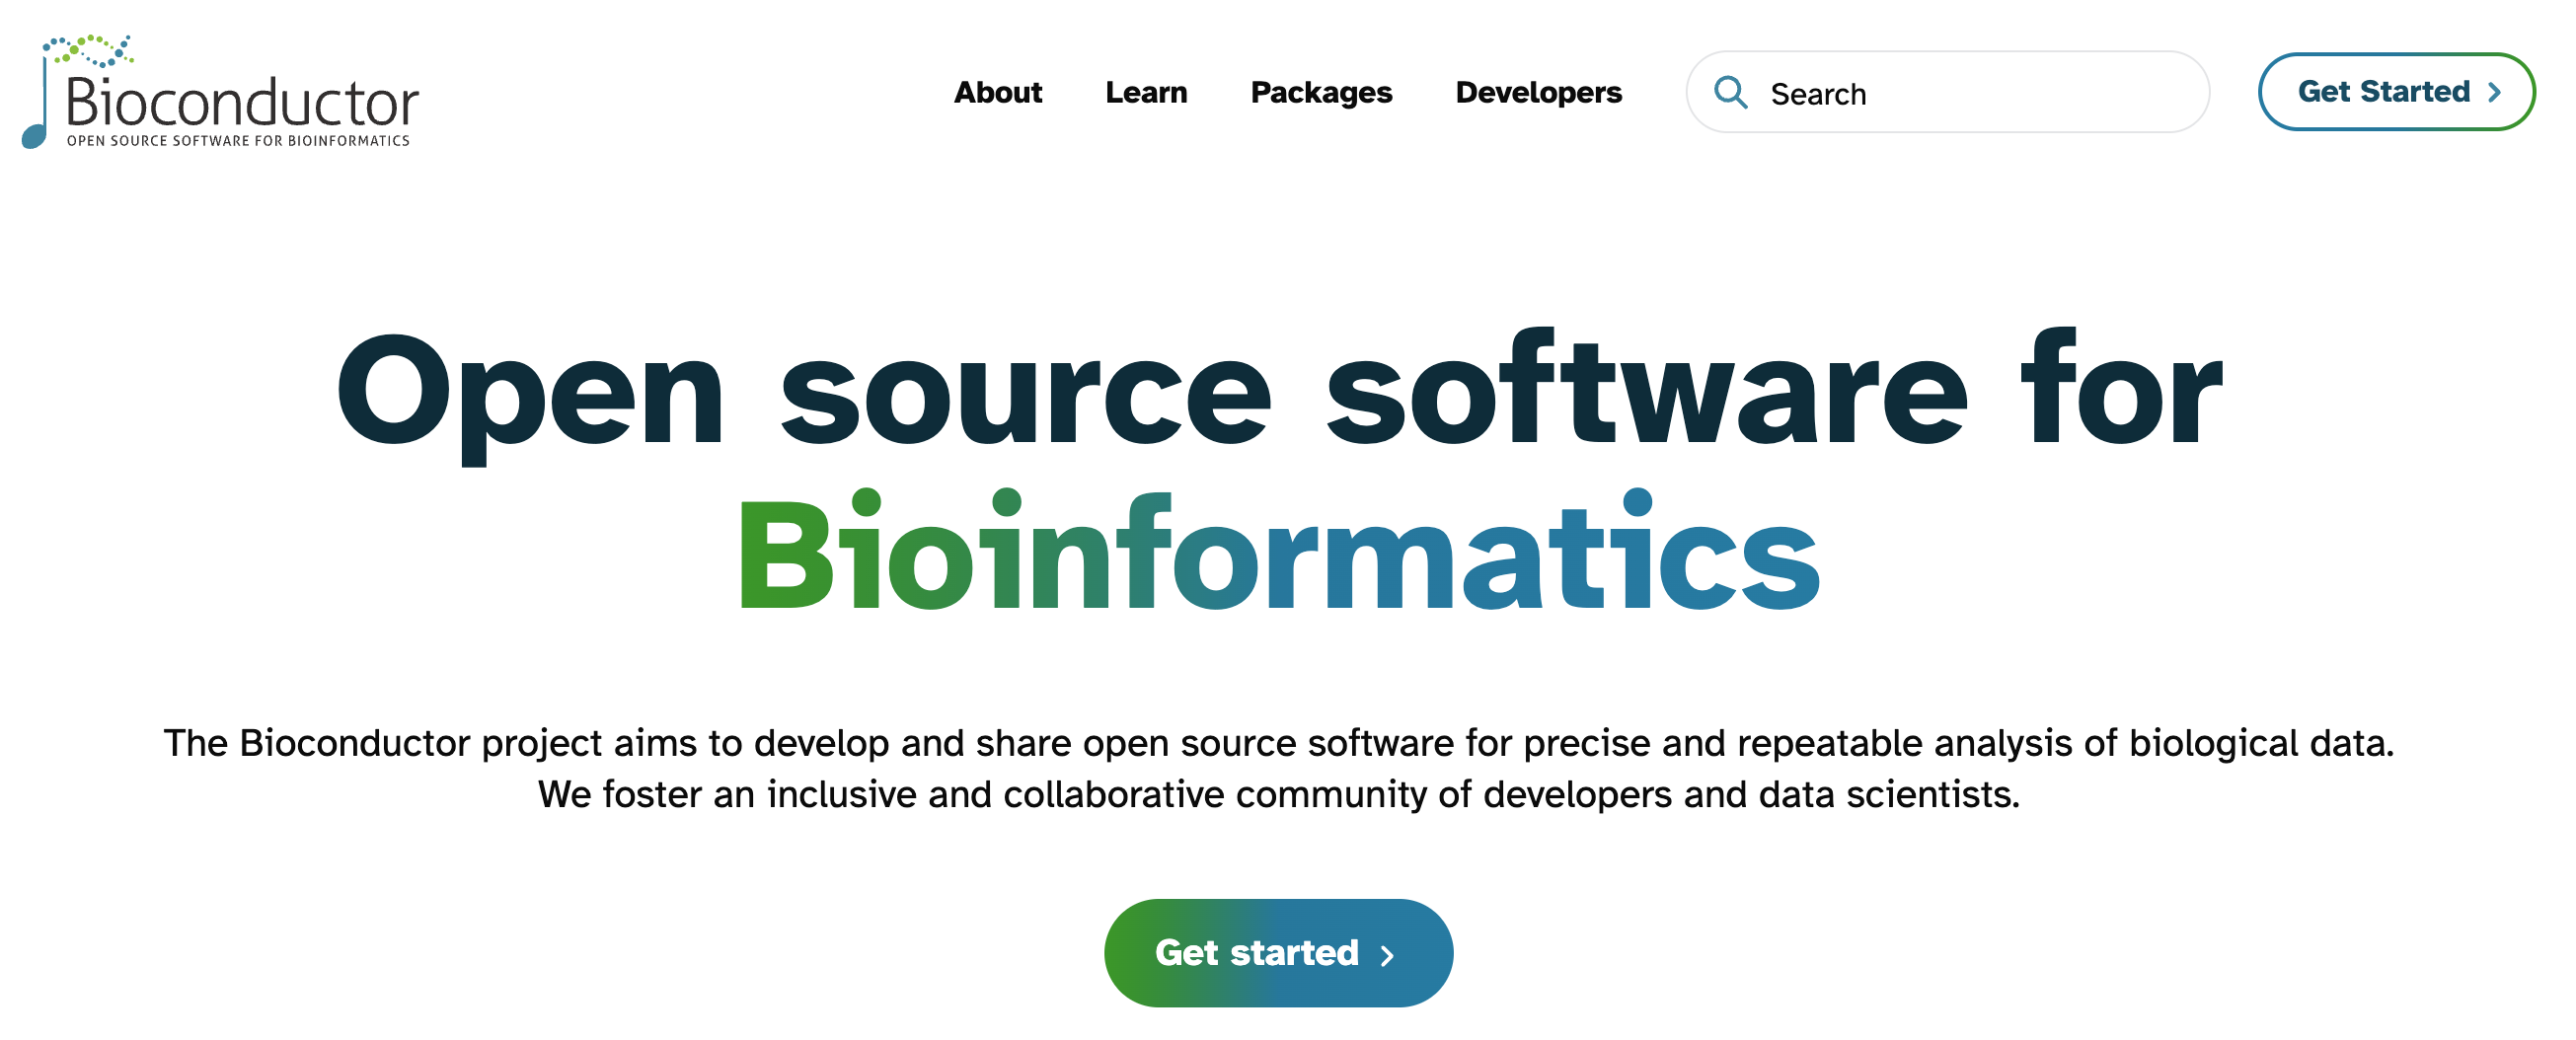

- maftools installation: https://www.bioconductor.org/packages/release/bioc/html/maftools.html

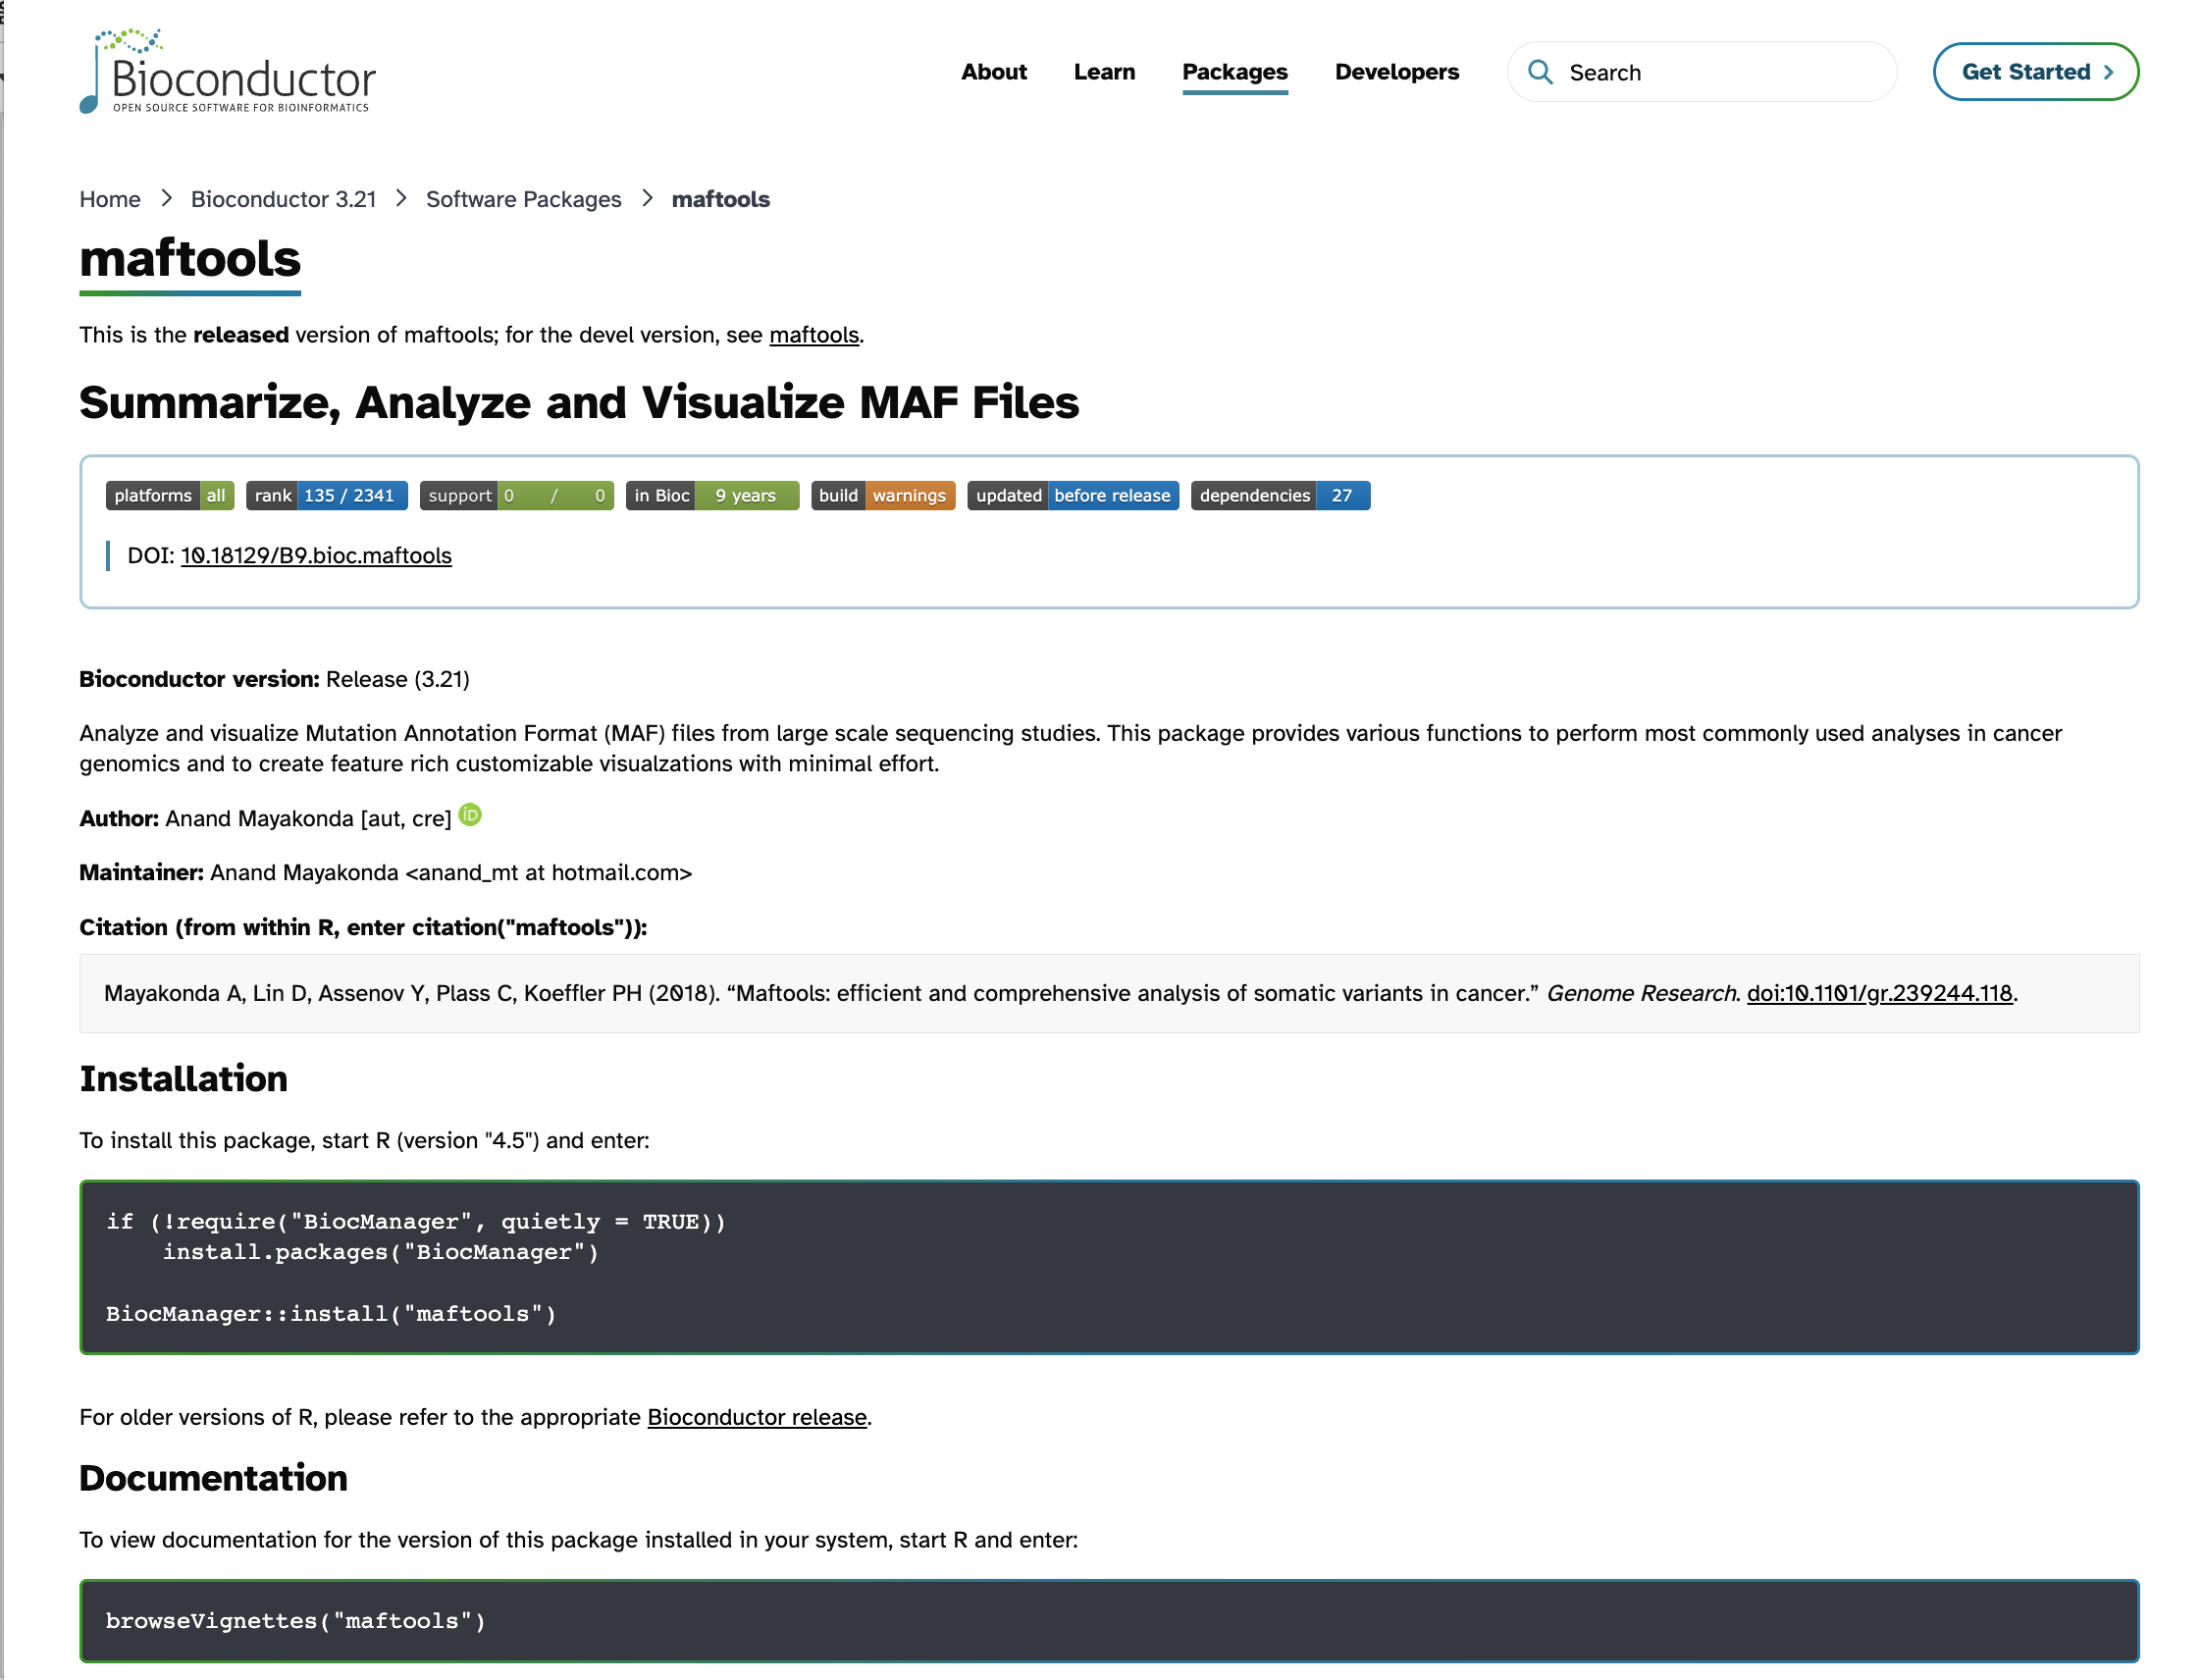


maftools 설치 (그림 참조)

In [4]:
# runtime: 3s
if (!require("BiocManager", quietly = TRUE))
    install.packages("BiocManager")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [10]:
# runtime: 60s
BiocManager::install("maftools")

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.rstudio.com

Bioconductor version 3.21 (BiocManager 1.30.26), R 4.5.1 (2025-06-13)

Installing package(s) 'maftools'

Old packages: 'later', 'xml2'



## Load packages

In [11]:
library(maftools)
library(ggplot2)
library(dplyr)
library(moonBook)
library(ggpubr)
library(RCurl)
library(hues)
library(pheatmap)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




# **R Basic code**

R의 내장데이터 중 하나인 `iris`를 이용해보겠습니다.

## Data handling

- 전체 데이터 확인

In [12]:
iris

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
<dbl>,<dbl>,<dbl>,<dbl>,<fct>
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5.0,3.6,1.4,0.2,setosa
5.4,3.9,1.7,0.4,setosa
4.6,3.4,1.4,0.3,setosa
5.0,3.4,1.5,0.2,setosa
4.4,2.9,1.4,0.2,setosa


- 데이터 일부 확인 (10줄)

In [ ]:
head(iris, n=10)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa
7,4.6,3.4,1.4,0.3,setosa
8,5.0,3.4,1.5,0.2,setosa
9,4.4,2.9,1.4,0.2,setosa


- 데이터 일부 확인 (아래서 10줄)

In [ ]:
tail(iris, n=10)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
141,6.7,3.1,5.6,2.4,virginica
142,6.9,3.1,5.1,2.3,virginica
143,5.8,2.7,5.1,1.9,virginica
144,6.8,3.2,5.9,2.3,virginica
145,6.7,3.3,5.7,2.5,virginica
146,6.7,3.0,5.2,2.3,virginica
147,6.3,2.5,5.0,1.9,virginica
148,6.5,3.0,5.2,2.0,virginica
149,6.2,3.4,5.4,2.3,virginica


- 데이터 구조 확인

In [ ]:
str(iris)

'data.frame':	150 obs. of  5 variables:
 $ Sepal.Length: num  5.1 4.9 4.7 4.6 5 5.4 4.6 5 4.4 4.9 ...
 $ Sepal.Width : num  3.5 3 3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 ...
 $ Petal.Length: num  1.4 1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5 ...
 $ Petal.Width : num  0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 ...
 $ Species     : Factor w/ 3 levels "setosa","versicolor",..: 1 1 1 1 1 1 1 1 1 1 ...


- 데이터 요약 통계

In [ ]:
mytable(iris)

name,stats,N,missing,rate,class
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
Sepal.Length,5.8 ± 0.8,150,0,( 0.0%),continuous
Sepal.Width,3.1 ± 0.4,150,0,( 0.0%),continuous
Petal.Length,3.8 ± 1.8,150,0,( 0.0%),continuous
Petal.Width,1.2 ± 0.8,150,0,( 0.0%),continuous
Species,,150,0,( 0.0%),categorical
- setosa,50 (33.3%),,,,
- versicolor,50 (33.3%),,,,
- virginica,50 (33.3%),,,,


- Species에 따른 꽃잎의 길이와 너비 비교

In [ ]:
mytable(Species ~ ., data = iris)


          Descriptive Statistics by 'Species'         
——————————————————————————————————————————————————————— 
                setosa    versicolor   virginica    p  
                (N=50)      (N=50)      (N=50)   
——————————————————————————————————————————————————————— 
 Sepal.Length  5.0 ±  0.4  5.9 ±  0.5  6.6 ±  0.6 0.000
 Sepal.Width   3.4 ±  0.4  2.8 ±  0.3  3.0 ±  0.3 0.000
 Petal.Length  1.5 ±  0.2  4.3 ±  0.5  5.6 ±  0.6 0.000
 Petal.Width   0.2 ±  0.1  1.3 ±  0.2  2.0 ±  0.3 0.000
——————————————————————————————————————————————————————— 

- Species가 setosa인 observation만 고르기

In [13]:
subset(iris, Species == "setosa")

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa
7,4.6,3.4,1.4,0.3,setosa
8,5.0,3.4,1.5,0.2,setosa
9,4.4,2.9,1.4,0.2,setosa


In [14]:
iris_setosa = subset(iris, Species == "setosa")

In [15]:
str(iris_setosa)

'data.frame':	50 obs. of  5 variables:
 $ Sepal.Length: num  5.1 4.9 4.7 4.6 5 5.4 4.6 5 4.4 4.9 ...
 $ Sepal.Width : num  3.5 3 3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 ...
 $ Petal.Length: num  1.4 1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5 ...
 $ Petal.Width : num  0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 ...
 $ Species     : Factor w/ 3 levels "setosa","versicolor",..: 1 1 1 1 1 1 1 1 1 1 ...


## Data visualization

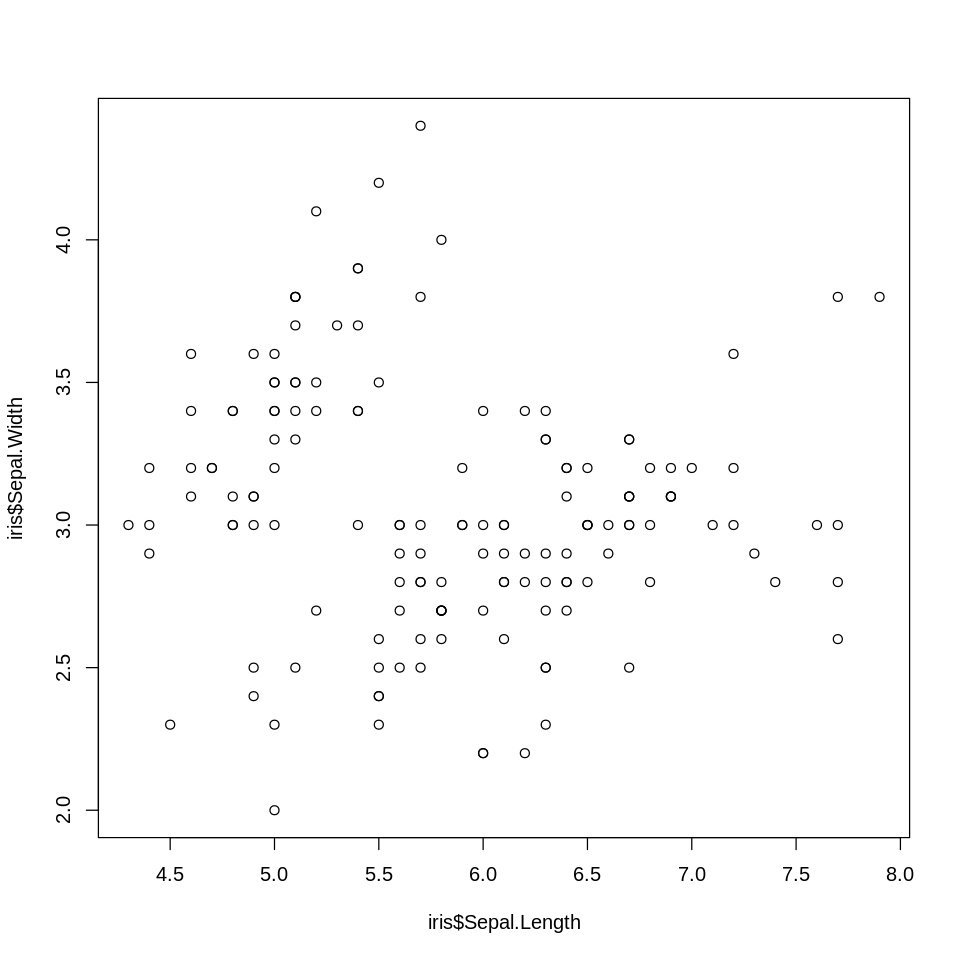

In [16]:
options(repr.plot.width = 8, repr.plot.height = 8)
plot(iris$Sepal.Length, iris$Sepal.Width)

In [22]:
pdf("0_iris_plot.pdf", 5, 5)
plot(iris$Sepal.Length, iris$Sepal.Width)
dev.off()

agg_record_1050323619 
                    2

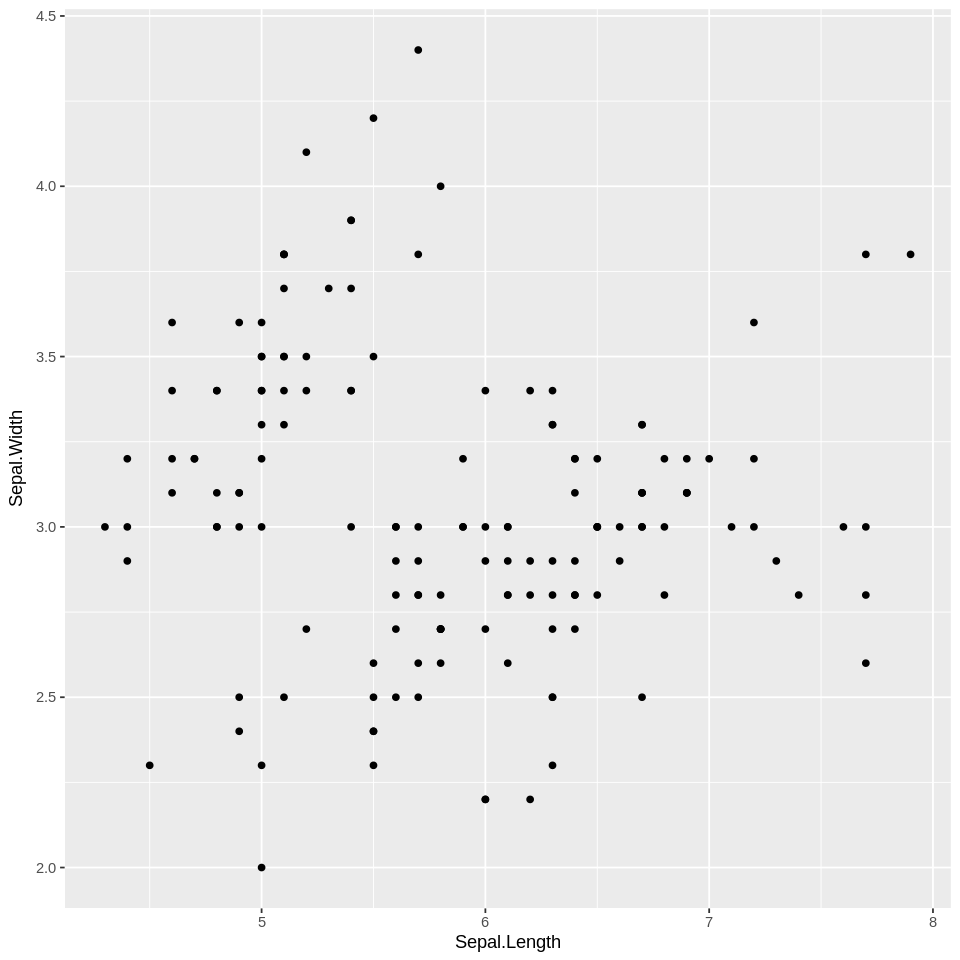

In [17]:
ggplot(iris, aes(x=Sepal.Length, y=Sepal.Width)) +
    geom_point()

`geom_smooth()` using formula = 'y ~ x'


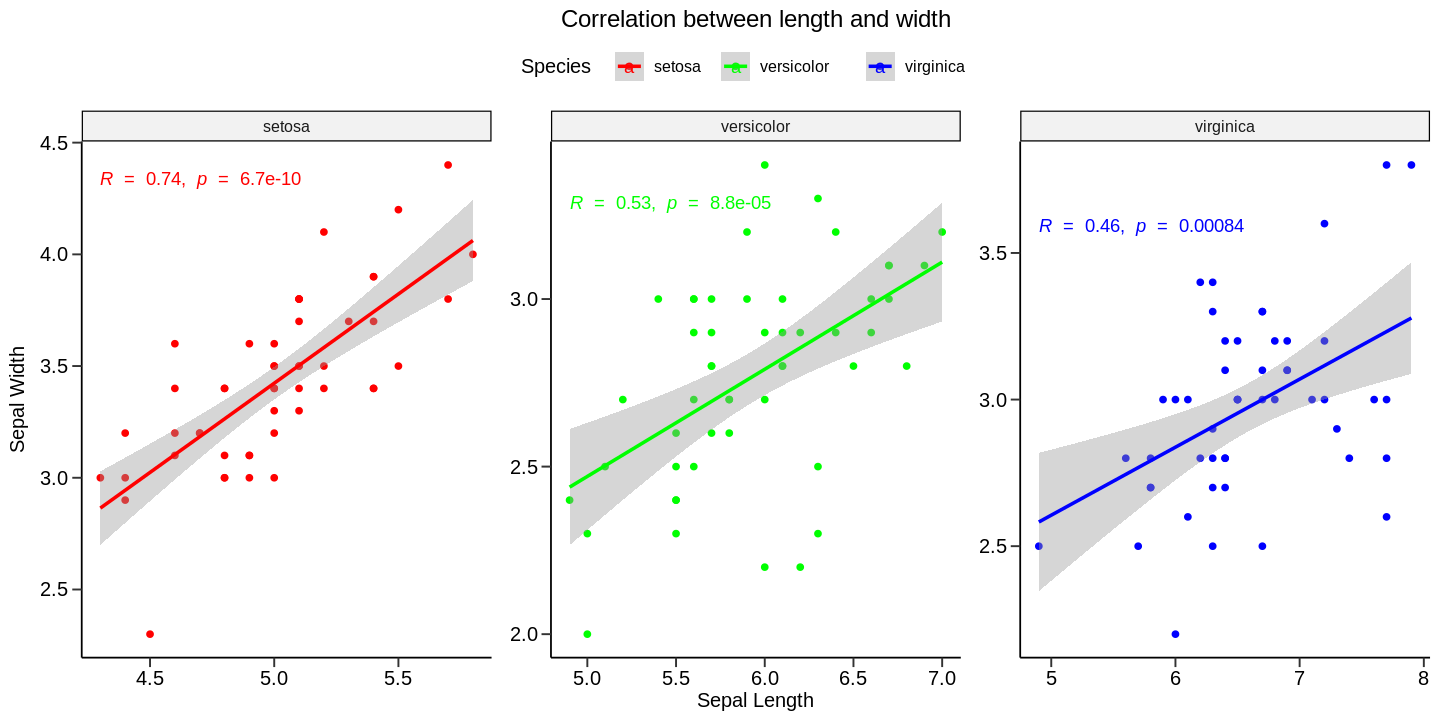

In [20]:
options(repr.plot.width = 12, repr.plot.height = 6)
ggplot(iris, aes(x=Sepal.Length, y=Sepal.Width, color=Species)) +
    geom_point() +
    scale_color_manual(values = c("red", "green", "blue")) +
    theme_pubr() +
    labs(x= "Sepal Length", y = "Sepal Width", title = "Correlation between length and width") +
    theme(axis.ticks.length = unit(2, "mm"),
          plot.title = element_text(hjust = 0.5)) +
    facet_wrap(~Species, scales = "free") +
    geom_smooth(method = "lm") +
    stat_cor()

In [21]:
pdf("0_iris_ggplot.pdf", 6, 5)
ggplot(iris, aes(x=Sepal.Length, y=Sepal.Width, color=Species)) +
    geom_point() +
    scale_color_manual(values = c("red", "green", "blue")) +
    theme_pubr() +
    labs(x= "Sepal Length", y = "Sepal Width", title = "Correlation between length and width") +
    theme(axis.ticks.length = unit(2, "mm"),
          plot.title = element_text(hjust = 0.5)) +
    facet_wrap(~Species, scales = "free") +
    geom_smooth(method = "lm") +
    stat_cor()
dev.off()

`geom_smooth()` using formula = 'y ~ x'


agg_record_158249656 
                   2

# **maftools : Summarize, Analyze and Visualize MAF Files**

- Main tutorial: https://bioconductor.org/packages/devel/bioc/vignettes/maftools/inst/doc/maftools.html





## Introduction

With advances in Cancer Genomics, [Mutation Annotation Format](https://docs.gdc.cancer.gov/Data/File_Formats/MAF_Format/) (MAF) is being widely accepted and used to store somatic variants detected. [The Cancer Genome Atlas](http://cancergenome.nih.gov) Project has sequenced **over 30 different cancers** with sample size of each cancer type being over 200. Resulting dataconsisting of somatic variants are stored in the form of [Mutation Annotation Format](https://docs.gdc.cancer.gov/Data/File_Formats/MAF_Format/). This package attempts to summarize, analyze, annotate and visualize MAF files in an efficient manner from either TCGA sources or any in-house studies as long as the data is in MAF format.


## Input 데이터 확인

- maf 파일

  Complete specification of MAF files can be found on [NCI GDC documentation page](https://docs.gdc.cancer.gov/Data/File_Formats/MAF_Format/).

  - Generating MAF files
    For VCF files or simple tabular files, easy option is to use [vcf2maf](https://github.com/mskcc/vcf2maf) utility which will annotate VCFs, prioritize transcripts, and generates an MAF.
    
  - MAF field requirements
    - Mandatory fields: **Hugo_Symbol, Chromosome, Start_Position, End_Position, Reference_Allele, Tumor_Seq_Allele2, Variant_Classification, Variant_Type and Tumor_Sample_Barcode**.

    - Recommended optional fields: non MAF specific fields containing **VAF** (Variant Allele Frequency) and amino acid change information.

- 임상정보 (optional)

----


**This vignette demonstrates the usage and application of maftools on an example MAF file from [TCGA LAML](https://portal.gdc.cancer.gov/projects/TCGA-LAML) cohort.**

Q. What is TCGA-LAML?

In [23]:
tcga_abbreviation = read.delim("https://raw.githubusercontent.com/oghzzang/AMC_NGS1/refs/heads/master/03_R/extdata/tcga_name.txt", sep = "\t")

In [24]:
tcga_abbreviation

Study.Abbreviation,Study.Name
<chr>,<chr>
LAML,Acute Myeloid Leukemia
ACC,Adrenocortical carcinoma
BLCA,Bladder Urothelial Carcinoma
LGG,Brain Lower Grade Glioma
BRCA,Breast invasive carcinoma
CESC,Cervical squamous cell carcinoma and endocervical adenocarcinoma
CHOL,Cholangiocarcinoma
LCML,Chronic Myelogenous Leukemia
COAD,Colon adenocarcinoma


In [25]:
subset(tcga_abbreviation, Study.Abbreviation == "LAML")

,Study.Abbreviation,Study.Name
,<chr>,<chr>
1,LAML,Acute Myeloid Leukemia


## Overview of the package

maftools functions can be categorized into mainly Visualization and Analysis modules. Each of these functions and a short description is summarized as shown below. Usage is simple, just read your MAF file with `read.maf` (along with copy-number data if available) and pass the resulting MAF object to the desired function for plotting or analysis.


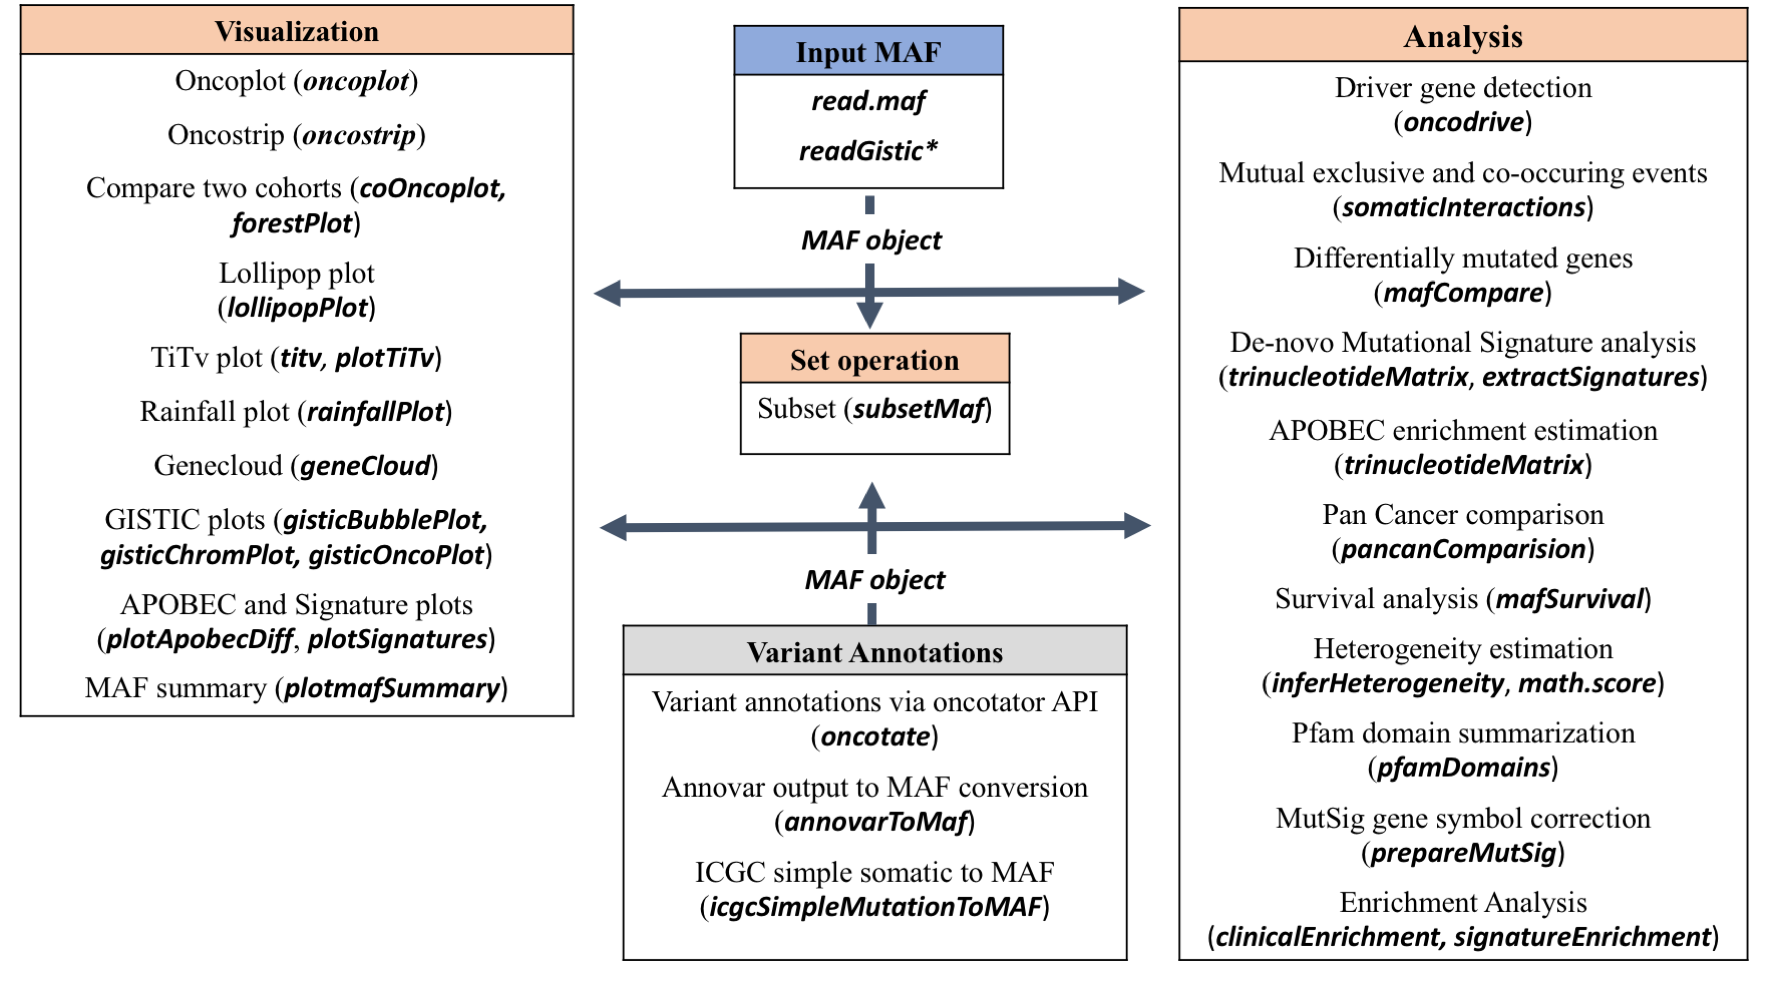

## Reading and summarizing maf files

### Required input files

-   an MAF file - can be gz compressed. Required.
-   an optional but recommended clinical data associated with each sample/Tumor_Sample_Barcode in MAF.

### Reading MAF files.

`read.maf` function reads MAF files, summarizes it in various ways and stores it as an MAF object. Even though MAF file is alone enough, it is recommended to provide annotations associated with samples in MAF. One can also integrate copy number data if available.

Note that by default, Variants with [High/Moderate consequences](https://m.ensembl.org/info/genome/variation/prediction/predicted_data.html) are considered as non-synonymous. You change this behavior with the argument `vc_nonSyn` in `read.maf`.


In [26]:
system("wget https://github.com/oghzzang/AMC_NGS1/raw/refs/heads/master/03_R/extdata/tcga_laml.maf.gz")
system("wget https://raw.githubusercontent.com/oghzzang/AMC_NGS1/refs/heads/master/03_R/extdata/tcga_laml_annot.tsv")
system("wget https://github.com/oghzzang/AMC_NGS1/raw/refs/heads/master/03_R/extdata/brca.maf.gz")

In [27]:
#path to TCGA LAML MAF file
laml.maf = "tcga_laml.maf.gz"

#clinical information containing survival information and histology. This is optional
laml.clin = "tcga_laml_annot.tsv"

#### MAF file

- Mandatory fields: Hugo_Symbol, Chromosome, Start_Position, End_Position, Reference_Allele, Tumor_Seq_Allele2, Variant_Classification, Variant_Type and Tumor_Sample_Barcode.

- Recommended optional fields: non MAF specific fields containing VAF (Variant Allele Frequency) and amino acid change information.

In [ ]:
read.delim(laml.maf) %>% head(n=5)

,Hugo_Symbol,Entrez_Gene_Id,Center,NCBI_Build,Chromosome,Start_Position,End_position,Strand,Variant_Classification,Variant_Type,Reference_Allele,Tumor_Seq_Allele1,Tumor_Seq_Allele2,Tumor_Sample_Barcode,Protein_Change,i_TumorVAF_WU,i_transcript_name
,<chr>,<int>,<chr>,<int>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>
1,ABCA10,10349,genome.wustl.edu,37,17,67170917,67170917,+,Splice_Site,SNP,T,T,C,TCGA-AB-2988,p.K960R,45.66000,NM_080282.3
2,ABCA4,24,genome.wustl.edu,37,1,94490594,94490594,+,Missense_Mutation,SNP,C,C,T,TCGA-AB-2869,p.R1517H,38.12000,NM_000350.2
3,ABCB11,8647,genome.wustl.edu,37,2,169780250,169780250,+,Missense_Mutation,SNP,G,G,A,TCGA-AB-3009,p.A1283V,46.97218,NM_003742.2
4,ABCC11,85320,genome.wustl.edu,37,16,48244997,48244997,+,Silent,SNP,G,G,A,TCGA-AB-2830,p.I490I,34.27000,NM_032583.3
5,ABCC3,8714,genome.wustl.edu,37,17,48760974,48760974,+,Missense_Mutation,SNP,C,C,T,TCGA-AB-2887,p.P1271S,56.41000,NM_003786.1


- How to calculate VAF coloumn?

In [44]:
system("wget https://github.com/oghzzang/AMC_NGS1/raw/refs/heads/master/03_R/extdata/somatic.pass.maf")

In [45]:
test.maf = read.delim("somatic.pass.maf", comment.char = "#")

In [35]:
test.maf

Hugo_Symbol,Entrez_Gene_Id,Center,NCBI_Build,Chromosome,Start_Position,End_Position,Strand,Variant_Classification,Variant_Type,⋯,ExAC_AC_AN,ExAC_AC_AN_AFR,ExAC_AC_AN_AMR,ExAC_AC_AN_EAS,ExAC_AC_AN_FIN,ExAC_AC_AN_NFE,ExAC_AC_AN_OTH,ExAC_AC_AN_SAS,ExAC_FILTER,vcf_pos
<chr>,<int>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,⋯,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<int>
CCT8,10694,.,GRCh38,chr21,29056769,29056769,+,Intron,SNP,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,29056769


In [38]:
colnames(test.maf)

[1] "Hugo_Symbol"                   "Entrez_Gene_Id"               
  [3] "Center"                        "NCBI_Build"                   
  [5] "Chromosome"                    "Start_Position"               
  [7] "End_Position"                  "Strand"                       
  [9] "Variant_Classification"        "Variant_Type"                 
 [11] "Reference_Allele"              "Tumor_Seq_Allele1"            
 [13] "Tumor_Seq_Allele2"             "dbSNP_RS"                     
 [15] "dbSNP_Val_Status"              "Tumor_Sample_Barcode"         
 [17] "Matched_Norm_Sample_Barcode"   "Match_Norm_Seq_Allele1"       
 [19] "Match_Norm_Seq_Allele2"        "Tumor_Validation_Allele1"     
 [21] "Tumor_Validation_Allele2"      "Match_Norm_Validation_Allele1"
 [23] "Match_Norm_Validation_Allele2" "Verification_Status"          
 [25] "Validation_Status"             "Mutation_Status"              
 [27] "Sequencing_Phase"              "Sequence_Source"              
 [29] "Validation_Method"             "Score"                        
 [31] "BAM_File"                      "Sequencer"                    
 [33] "Tumor_Sample_UUID"             "Matched_Norm_Sample_UUID"     
 [35] "HGVSc"                         "HGVSp"                        
 [37] "HGVSp_Short"                   "Transcript_ID"                
 [39] "Exon_Number"                   "t_depth"                      
 [41] "t_ref_count"                   "t_alt_count"                  
 [43] "n_depth"                       "n_ref_count"                  
 [45] "n_alt_count"                   "all_effects"                  
 [47] "Allele"                        "Gene"                         
 [49] "Feature"                       "Feature_type"                 
 [51] "Consequence"                   "cDNA_position"                
 [53] "CDS_position"                  "Protein_position"             
 [55] "Amino_acids"                   "Codons"                       
 [57] "Existing_variation"            "ALLELE_NUM"                   
 [59] "DISTANCE"                      "STRAND_VEP"                   
 [61] "SYMBOL"                        "SYMBOL_SOURCE"                
 [63] "HGNC_ID"                       "BIOTYPE"                      
 [65] "CANONICAL"                     "CCDS"                         
 [67] "ENSP"                          "SWISSPROT"                    
 [69] "TREMBL"                        "UNIPARC"                      
 [71] "RefSeq"                        "SIFT"                         
 [73] "PolyPhen"                      "EXON"                         
 [75] "INTRON"                        "DOMAINS"                      
 [77] "AF"                            "AFR_AF"                       
 [79] "AMR_AF"                        "ASN_AF"                       
 [81] "EAS_AF"                        "EUR_AF"                       
 [83] "SAS_AF"                        "AA_AF"                        
 [85] "EA_AF"                         "CLIN_SIG"                     
 [87] "SOMATIC"                       "PUBMED"                       
 [89] "MOTIF_NAME"                    "MOTIF_POS"                    
 [91] "HIGH_INF_POS"                  "MOTIF_SCORE_CHANGE"           
 [93] "IMPACT"                        "PICK"                         
 [95] "VARIANT_CLASS"                 "TSL"                          
 [97] "HGVS_OFFSET"                   "PHENO"                        
 [99] "MINIMISED"                     "ExAC_AF"                      
[101] "ExAC_AF_AFR"                   "ExAC_AF_AMR"                  
[103] "ExAC_AF_EAS"                   "ExAC_AF_FIN"                  
[105] "ExAC_AF_NFE"                   "ExAC_AF_OTH"                  
[107] "ExAC_AF_SAS"                   "GENE_PHENO"                   
[109] "FILTER"                        "flanking_bps"                 
[111] "vcf_id"                        "vcf_qual"                     
[113] "ExAC_AF_Adj"                   "ExAC_AC_AN_Adj"               
[115] "ExAC_

In [39]:
test.short.maf = select(test.maf,
  c("Hugo_Symbol", "Hugo_Symbol", "Entrez_Gene_Id", "Center",
  "NCBI_Build",	"Chromosome",	"Start_Position",	"End_Position", "Variant_Classification", "Variant_Type",
  "Reference_Allele", "Tumor_Seq_Allele1",	"Tumor_Seq_Allele2", "Tumor_Sample_Barcode",
  "t_depth", "t_ref_count", "t_alt_count"))

In [46]:
test.short.maf

Hugo_Symbol,Entrez_Gene_Id,Center,NCBI_Build,Chromosome,Start_Position,End_Position,Variant_Classification,Variant_Type,Reference_Allele,Tumor_Seq_Allele1,Tumor_Seq_Allele2,Tumor_Sample_Barcode,t_depth,t_ref_count,t_alt_count,HGVSp,t_vaf
<chr>,<int>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<lgl>,<dbl>
CCT8,10694,.,GRCh38,chr21,29056769,29056769,Intron,SNP,C,C,A,tumor,13,9,4,NA,30.76923


In [47]:
test.short.maf$t_vaf = test.short.maf$[[Quiz-3]] / test.short.maf$[[Quiz-4]] * 100

#### Clinical file (optional, but recommended)

In [ ]:
read.delim(laml.clin) %>% head(n=5)

,Tumor_Sample_Barcode,FAB_classification,days_to_last_followup,Overall_Survival_Status
,<chr>,<chr>,<dbl>,<int>
1,TCGA-AB-2802,M4,365,1
2,TCGA-AB-2803,M3,792,1
3,TCGA-AB-2804,M3,2557,0
4,TCGA-AB-2805,M0,577,1
5,TCGA-AB-2806,M1,945,1


#### Make MAF object

In [48]:
laml = read.maf(maf = laml.maf, clinicalData = laml.clin)

-Reading
-Validating
-Silent variants: 475 
-Summarizing
-Processing clinical data
-Finished in 0.441s elapsed (0.413s cpu) 


## MAF object

Summarized MAF file is stored as an MAF object. MAF object contains main maf file, summarized data and any associated sample annotations.

There are accessor methods to access the useful slots from MAF object.


In [49]:
laml

An object of class  MAF 
                   ID          summary  Mean Median
               <char>           <char> <num>  <num>
 1:        NCBI_Build               37    NA     NA
 2:            Center genome.wustl.edu    NA     NA
 3:           Samples              193    NA     NA
 4:            nGenes             1241    NA     NA
 5:   Frame_Shift_Del               52 0.269      0
 6:   Frame_Shift_Ins               91 0.472      0
 7:      In_Frame_Del               10 0.052      0
 8:      In_Frame_Ins               42 0.218      0
 9: Missense_Mutation             1342 6.953      7
10: Nonsense_Mutation              103 0.534      0
11:       Splice_Site               92 0.477      0
12:             total             1732 8.974      9

In [50]:
#Shows sample summry.
getSampleSummary(laml) %>% head()

Tumor_Sample_Barcode,Frame_Shift_Del,Frame_Shift_Ins,In_Frame_Del,In_Frame_Ins,Missense_Mutation,Nonsense_Mutation,Splice_Site,total
<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>
TCGA-AB-3009,0,5,0,1,25,2,1,34
TCGA-AB-2807,1,0,1,0,16,3,4,25
TCGA-AB-2959,0,0,0,0,22,0,1,23
TCGA-AB-3002,0,0,0,0,15,1,5,21
TCGA-AB-2849,0,1,0,0,16,1,2,20
TCGA-AB-2923,1,1,0,0,15,3,0,20


In [51]:
#Shows gene summary.
getGeneSummary(laml) %>% head()

Hugo_Symbol,Frame_Shift_Del,Frame_Shift_Ins,In_Frame_Del,In_Frame_Ins,Missense_Mutation,Nonsense_Mutation,Splice_Site,total,MutatedSamples,AlteredSamples
<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>
FLT3,0,0,1,33,15,0,3,52,52,52
DNMT3A,4,0,0,0,39,5,6,54,48,48
NPM1,0,33,0,0,1,0,0,34,33,33
IDH2,0,0,0,0,20,0,0,20,20,20
IDH1,0,0,0,0,18,0,0,18,18,18
TET2,10,4,0,0,4,8,1,27,17,17


In [ ]:
#shows clinical data associated with samples
getClinicalData(laml) %>% head()

Tumor_Sample_Barcode,FAB_classification,days_to_last_followup,Overall_Survival_Status
<chr>,<chr>,<dbl>,<int>
TCGA-AB-2802,M4,365,1
TCGA-AB-2803,M3,792,1
TCGA-AB-2804,M3,2557,0
TCGA-AB-2805,M0,577,1
TCGA-AB-2806,M1,945,1
TCGA-AB-2807,M1,181,1


In [52]:
#Shows all fields in MAF
getFields(laml)

[1] "Hugo_Symbol"            "Entrez_Gene_Id"         "Center"                
 [4] "NCBI_Build"             "Chromosome"             "Start_Position"        
 [7] "End_Position"           "Strand"                 "Variant_Classification"
[10] "Variant_Type"           "Reference_Allele"       "Tumor_Seq_Allele1"     
[13] "Tumor_Seq_Allele2"      "Tumor_Sample_Barcode"   "Protein_Change"        
[16] "i_TumorVAF_WU"          "i_transcript_name"

In [53]:
#Writes maf summary to an output file with basename laml.
write.mafSummary(maf = laml, basename = '1_toy_laml')

## Visualization

### Plotting MAF summary

We can use `plotmafSummary` to plot the summary of the maf file, which displays number of variants in each sample as a stacked barplot and variant types as a boxplot summarized by Variant_Classification.


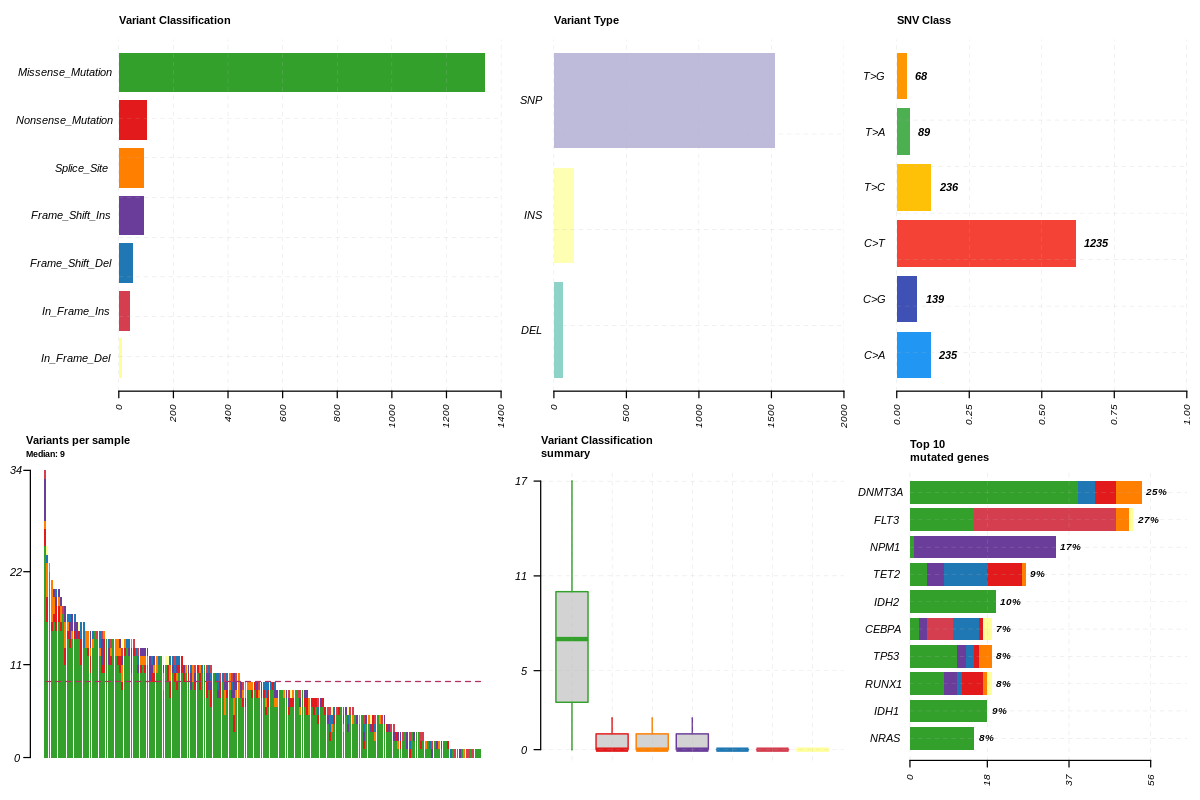

In [ ]:
options(repr.plot.width = 12, repr.plot.height = 8)
plotmafSummary(maf = laml, rmOutlier = TRUE, addStat = 'median', dashboard = TRUE, titvRaw = FALSE)

Use `mafbarplot` for a minimal barplot of mutated genes.


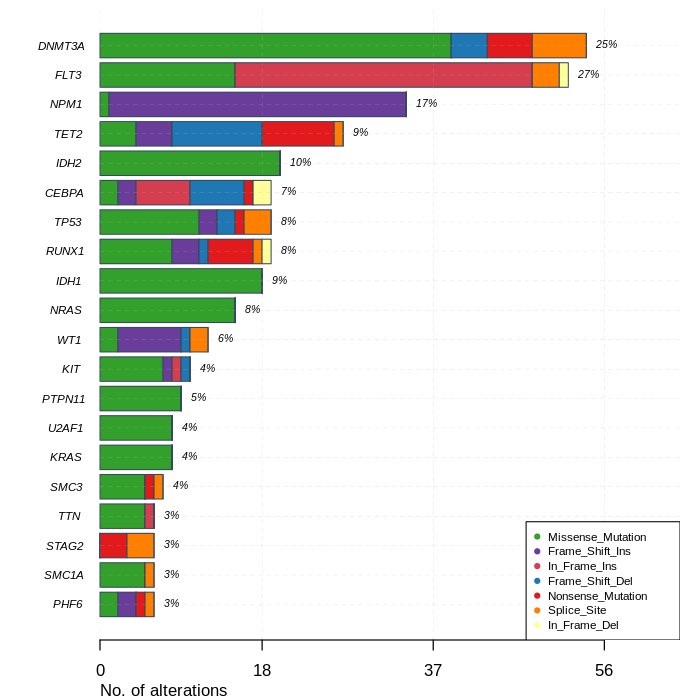

In [ ]:
options(repr.plot.width = 7, repr.plot.height = 7)
mafbarplot(maf = laml)

### Oncoplots

#### Drawing oncoplots

Better representation of maf file can be shown as oncoplots, also known as waterfall plots.


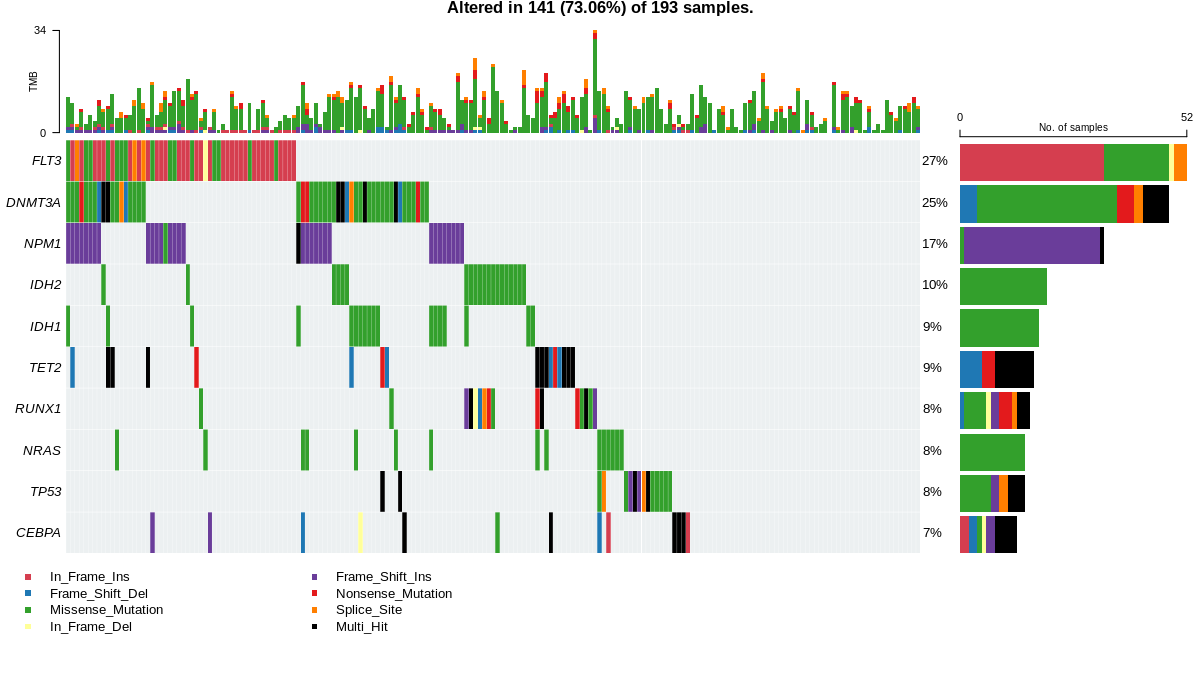

In [ ]:
#oncoplot for top ten mutated genes.
options(repr.plot.width = 12, repr.plot.height = 7)
oncoplot(maf = laml, top = 10)

NOTE: Variants annotated as `Multi_Hit` are those genes which are mutated more than once in the same sample.

#### Customizing oncoplots
For more details on customisation see the [Customizing oncoplots](http://bioconductor.org/packages/devel/bioc/vignettes/maftools/inst/doc/oncoplots.html) vignette.

- Including Transition/Transversions into oncoplot

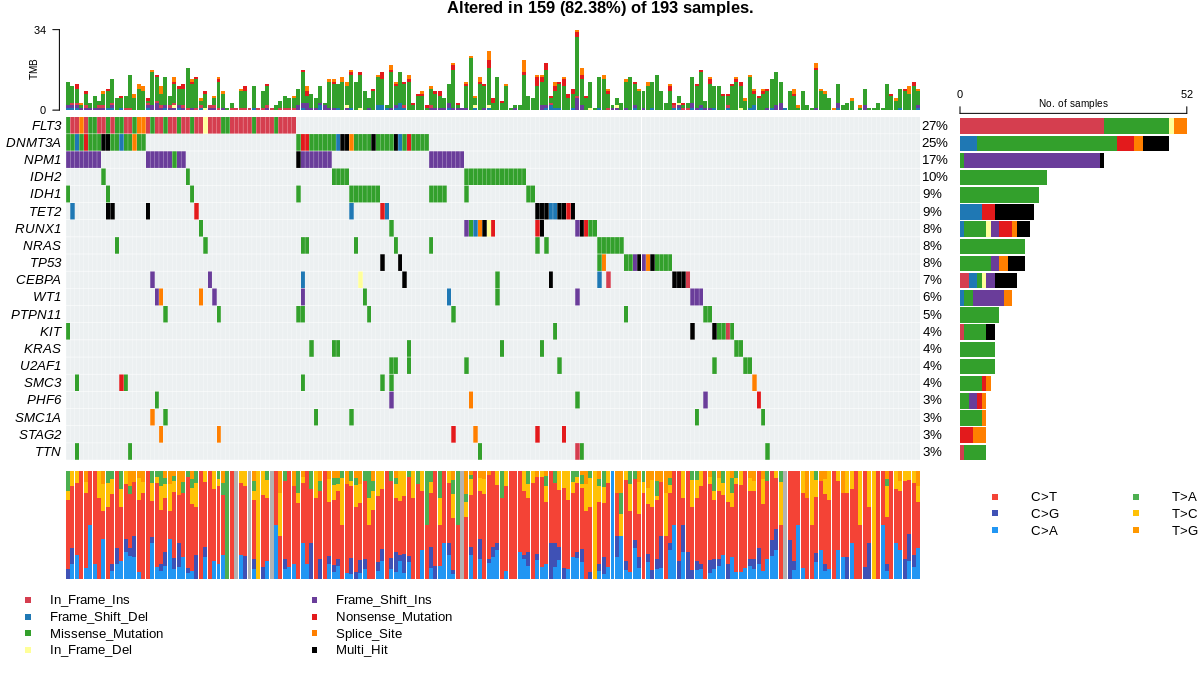

In [ ]:
options(repr.plot.width = 12, repr.plot.height = 7)
oncoplot(maf = laml, draw_titv = TRUE)

- Changing colors for variant classifications

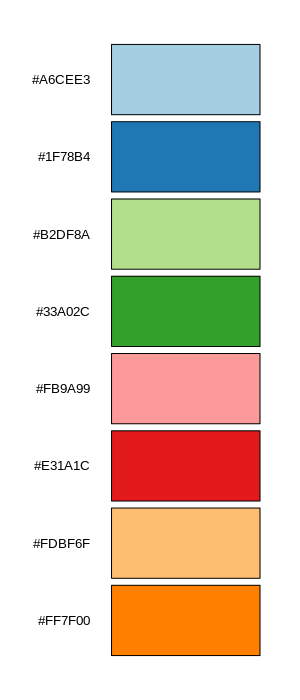

In [ ]:
#One can use any colors, here in this example color palette from RColorBrewer package is used
options(repr.plot.width = 3, repr.plot.height = 7)
vc_cols = RColorBrewer::brewer.pal(n = 8, name = 'Paired')
swatch(vc_cols)

In [ ]:
names(vc_cols) = c(
  'Frame_Shift_Del', 'Missense_Mutation', 'Nonsense_Mutation', 'Multi_Hit',
  'Frame_Shift_Ins', 'In_Frame_Ins', 'Splice_Site', 'In_Frame_Del'
)
print(vc_cols)

  Frame_Shift_Del Missense_Mutation Nonsense_Mutation         Multi_Hit 
        "#A6CEE3"         "#1F78B4"         "#B2DF8A"         "#33A02C" 
  Frame_Shift_Ins      In_Frame_Ins       Splice_Site      In_Frame_Del 
        "#FB9A99"         "#E31A1C"         "#FDBF6F"         "#FF7F00" 


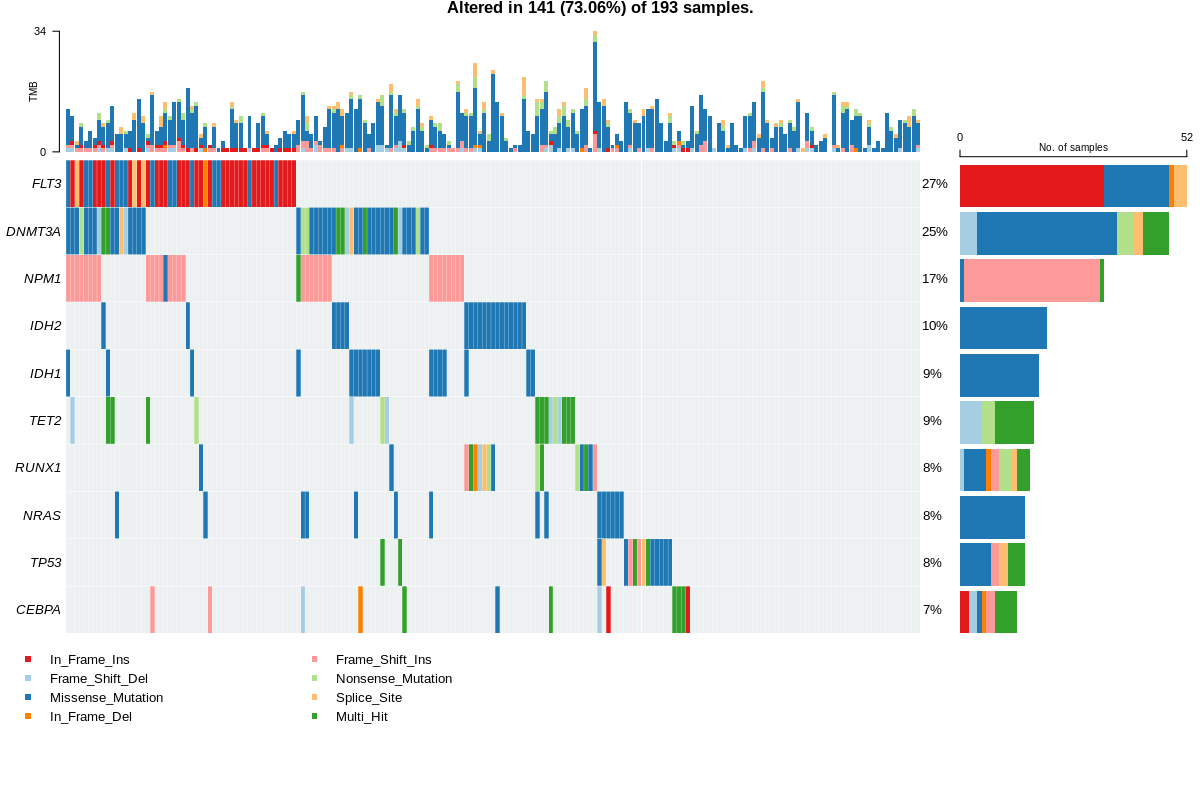

In [ ]:
options(repr.plot.width = 12, repr.plot.height = 8)
oncoplot(maf = laml, colors = vc_cols, top = 10)

- Including annotations

Annotations are stored in clinical.data slot of MAF.

In [ ]:
getClinicalData(x = laml) %>% head()

Tumor_Sample_Barcode,FAB_classification,days_to_last_followup,Overall_Survival_Status
<chr>,<chr>,<dbl>,<int>
TCGA-AB-2802,M4,365,1
TCGA-AB-2803,M3,792,1
TCGA-AB-2804,M3,2557,0
TCGA-AB-2805,M0,577,1
TCGA-AB-2806,M1,945,1
TCGA-AB-2807,M1,181,1


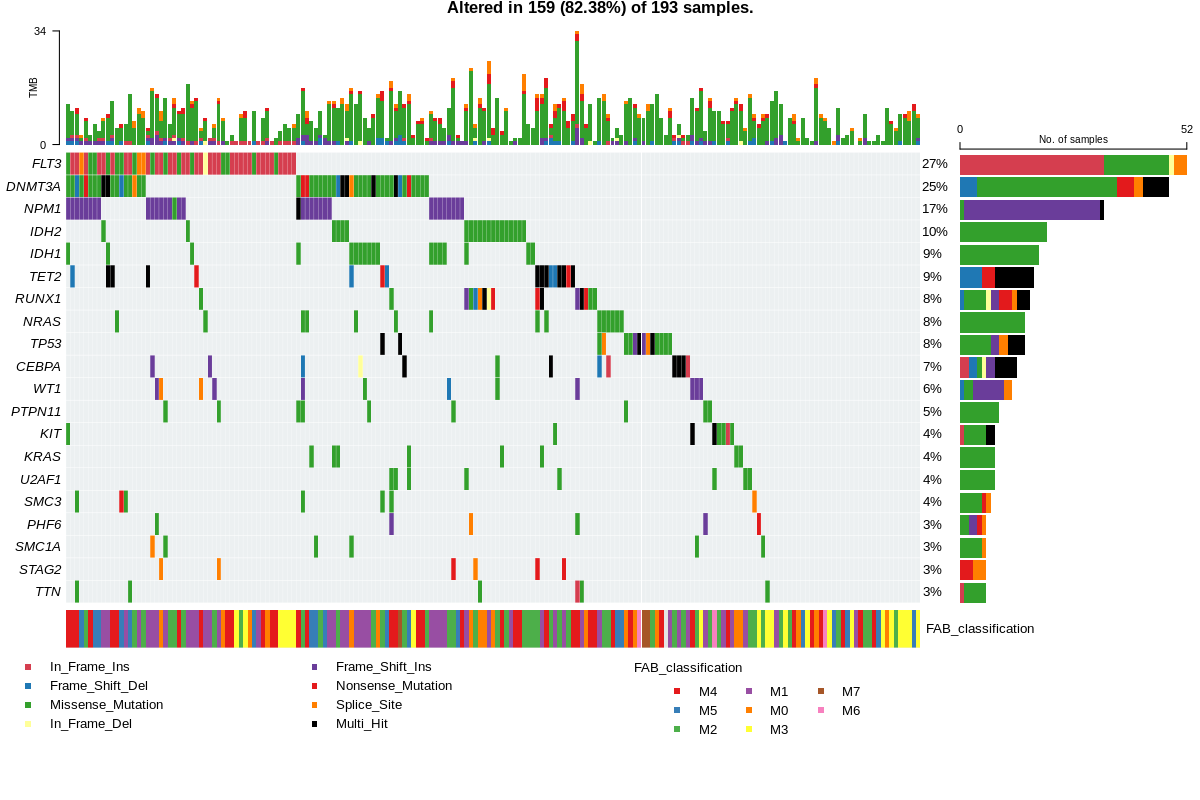

In [ ]:
options(repr.plot.width = 12, repr.plot.height = 8)
oncoplot(maf = laml, clinicalFeatures = 'FAB_classification')

More than one annotations can be included by passing them to the argument clinicalFeatures. Above plot can be further enhanced by sorting according to annotations. Custom colors can be specified as a list of named vectors for each levels.

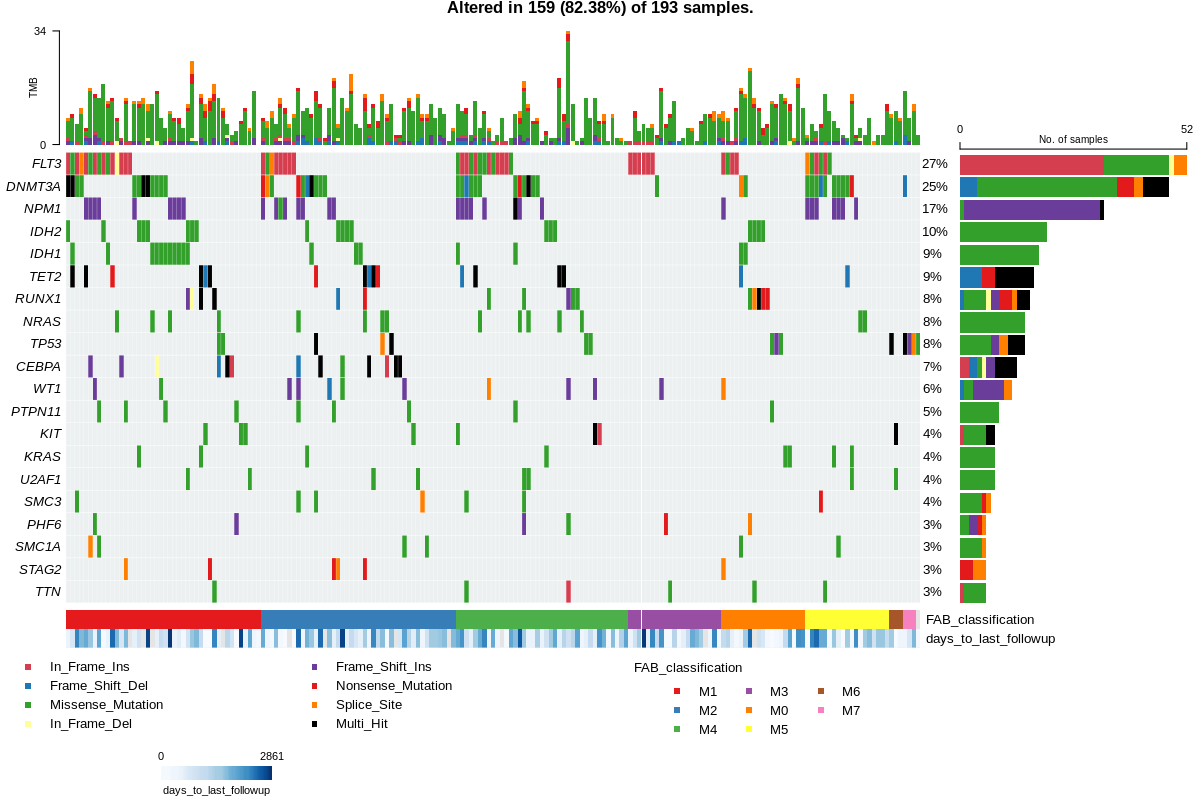

In [ ]:
options(repr.plot.width = 12, repr.plot.height = 8)
oncoplot(
  maf = laml,
  clinicalFeatures = c('FAB_classification', 'days_to_last_followup'),
  sortByAnnotation = TRUE,
)

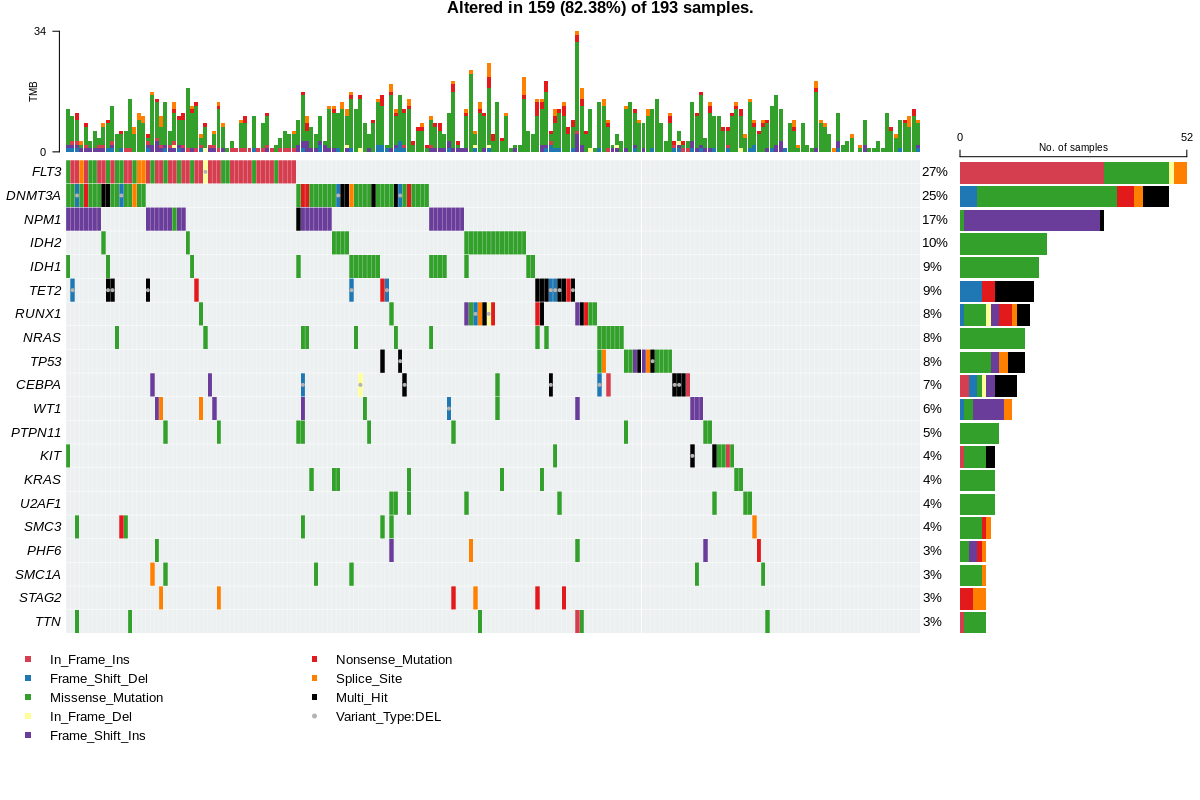

In [ ]:
options(repr.plot.width = 12, repr.plot.height = 8)
oncoplot(maf = laml,
         additionalFeature = c("Variant_Type", "DEL"))

Note that first argument (Tumor_Seq_Allele2) must a be column in MAF file, and second argument (C) is a value in that column. If you want to know what columns are present in the MAF file, use getFields.

In [ ]:
getFields(x = laml)

[1] "Hugo_Symbol"            "Entrez_Gene_Id"         "Center"                
 [4] "NCBI_Build"             "Chromosome"             "Start_Position"        
 [7] "End_Position"           "Strand"                 "Variant_Classification"
[10] "Variant_Type"           "Reference_Allele"       "Tumor_Seq_Allele1"     
[13] "Tumor_Seq_Allele2"      "Tumor_Sample_Barcode"   "Protein_Change"        
[16] "i_TumorVAF_WU"          "i_transcript_name"

### Transition and Transversions.

`titv` function classifies SNPs into [Transitions and Transversions](http://www.mun.ca/biology/scarr/Transitions_vs_Transversions.html) and returns a list of summarized tables in various ways. Summarized data can also be visualized as a boxplot showing overall distribution of six different conversions and as a stacked barplot showing fraction of conversions in each sample.


In [ ]:
laml.titv = titv(maf = laml, plot = FALSE, useSyn = TRUE)

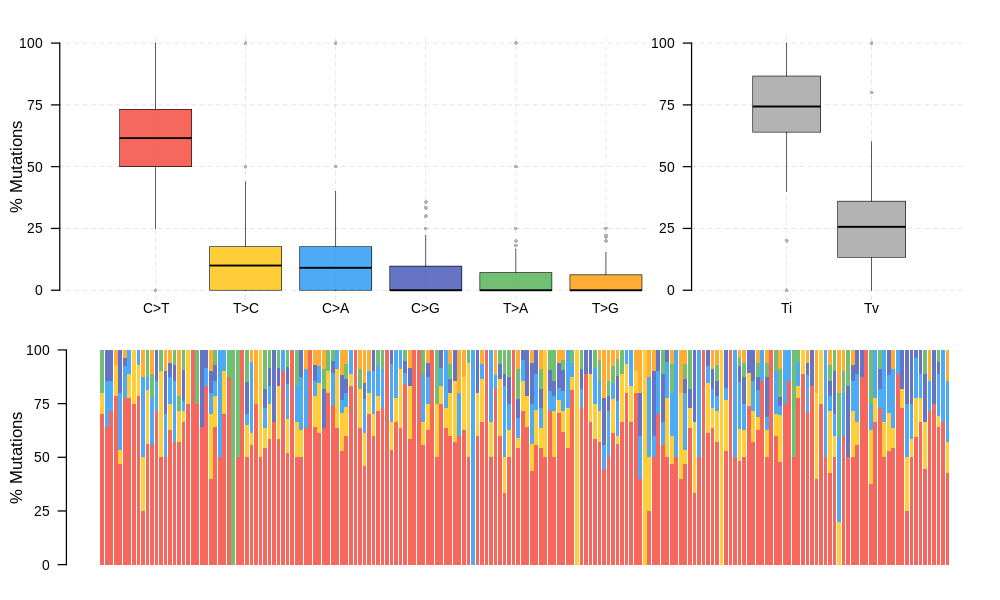

In [ ]:
#plot titv summary
options(repr.plot.width = 10, repr.plot.height = 6)
plotTiTv(res = laml.titv)

### Lollipop plots for amino acid changes

`lollipopPlot` function requires us to have amino acid changes information in the maf file. However MAF files have no clear guidelines on naming the field for amino acid changes, with different studies having different field (or column) names for amino acid changes. By default, `lollipopPlot` looks for column `AAChange`, and if its not found in the MAF file, it prints all available fields with a warning message. For below example, MAF file contains amino acid changes under a field/column name 'Protein_Change'. We will manually specify this using argument `AACol`.

By default lollipopPlot uses the longest isoform of the gene.

3 transcripts available. Use arguments refSeqID or proteinID to manually specify tx name.



     HGNC refseq.ID protein.ID aa.length
   <char>    <char>     <char>     <num>
1: DNMT3A NM_022552  NP_072046       912
2: DNMT3A NM_153759  NP_715640       723
3: DNMT3A NM_175629  NP_783328       912


Using longer transcript NM_022552 for now.

Removed 3 mutations for which AA position was not available



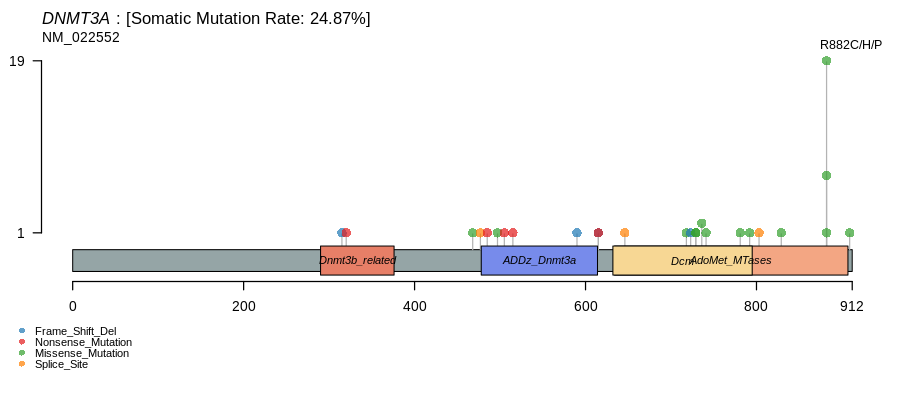

In [ ]:
#lollipop plot for DNMT3A, which is one of the most frequent mutated gene in Leukemia.
options(repr.plot.width = 9, repr.plot.height = 4)
lollipopPlot(
  maf = laml,
  gene = 'DNMT3A',
  AACol = 'Protein_Change',
  showMutationRate = TRUE,
  labelPos = 882
)


"Kataegis" are defined as those genomic segments containing six or more consecutive mutations with an average inter-mutation distance of less than or equal to 1,00 bp.

### Compare mutation load against TCGA cohorts

`tcgaCompare` uses mutation load from TCGA [MC3](https://gdc.cancer.gov/about-data/publications/mc3-2017) for comparing muttaion burden against 33 TCGA cohorts. Plot generated is [similar](http://www.nature.com/nature/journal/v500/n7463/fig_tab/nature12477_F1.html) to the one described in Alexandrov et al.


Warning message in FUN(X[[i]], ...):
“Removed 1 samples with zero mutations.”
Capture size [TCGA]:  35.8

Capture size [Input]: 35.8

Performing pairwise t-test for differences in mutation burden (per MB)..



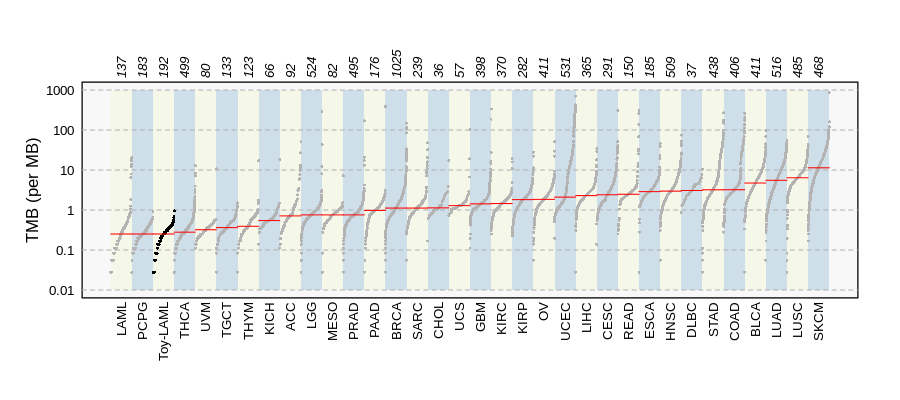

In [ ]:
options(repr.plot.width = 9, repr.plot.height = 4)
laml.mutload = tcgaCompare(
  maf = laml,
  cohortName = 'Toy-LAML',
  logscale = TRUE, capture_size = 35.8
  )

### Plotting VAF

This function plots Variant Allele Frequencies as a boxplot which quickly helps to estimate clonal status of top mutated genes (clonal genes usually have mean allele frequency around ~50% assuming pure sample)

In [ ]:
getFields(x = laml)

[1] "Hugo_Symbol"            "Entrez_Gene_Id"         "Center"                
 [4] "NCBI_Build"             "Chromosome"             "Start_Position"        
 [7] "End_Position"           "Strand"                 "Variant_Classification"
[10] "Variant_Type"           "Reference_Allele"       "Tumor_Seq_Allele1"     
[13] "Tumor_Seq_Allele2"      "Tumor_Sample_Barcode"   "Protein_Change"        
[16] "i_TumorVAF_WU"          "i_transcript_name"

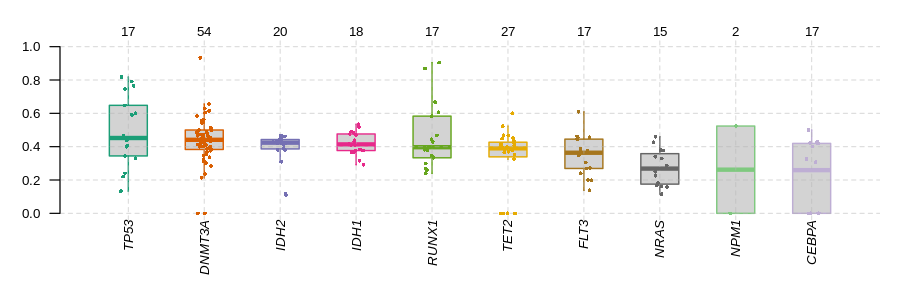

In [ ]:
options(repr.plot.width = 9, repr.plot.height = 3)
plotVaf(maf = laml, vafCol = 'i_TumorVAF_WU')

## Analysis

### Clinical enrichment analysis

`clinicalEnrichment` is another function which takes any clinical feature associated with the samples and performs enrichment analysis. It performs various groupwise and pairwise comparisions to identify enriched mutations for every category within a clincila feature. Below is an example to identify mutations associated with FAB_classification.


In [104]:
fab.ce = clinicalEnrichment(maf = laml, clinicalFeature = 'FAB_classification')

#Results are returned as a list. Significant associations p-value < 0.05
fab.ce$groupwise_comparision[p_value < 0.05]

Sample size per factor in FAB_classification:




M0 M1 M2 M3 M4 M5 M6 M7 
19 44 44 21 39 19  3  3 


Hugo_Symbol,Group1,Group2,n_mutated_group1,n_mutated_group2,p_value,OR,OR_low,OR_high,fdr
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
IDH1,M1,Rest,11 of 44,7 of 149,0.0002597371,6.670592,2.173829026,21.9607250,0.0308575
TP53,M7,Rest,3 of 3,12 of 190,0.0003857187,Inf,5.355415451,Inf,0.0308575
DNMT3A,M5,Rest,10 of 19,38 of 174,0.0089427384,3.941207,1.333635173,11.8455979,0.3757978
CEBPA,M2,Rest,7 of 44,6 of 149,0.0117352110,4.463237,1.204699322,17.1341278,0.3757978
RUNX1,M0,Rest,5 of 19,11 of 174,0.0117436825,5.216902,1.243812880,19.4051505,0.3757978
NPM1,M5,Rest,7 of 19,26 of 174,0.0248582372,3.293201,1.001404899,10.1210509,0.5880102
NPM1,M3,Rest,0 of 21,33 of 172,0.0278630823,0.000000,0.000000000,0.8651972,0.5880102
DNMT3A,M3,Rest,1 of 21,47 of 172,0.0294005111,0.133827,0.003146708,0.8848897,0.5880102


Above results shows IDH1 mutations are enriched in M1 subtype of leukemia compared to rest of the cohort. Similarly DNMT3A is in M5, RUNX1 is in M0, and so on. These are well known results and this function effectively recaptures them. One can use any sort of clincial feature to perform such an analysis. There is also a small function - `plotEnrichmentResults` which can be used to plot these results.


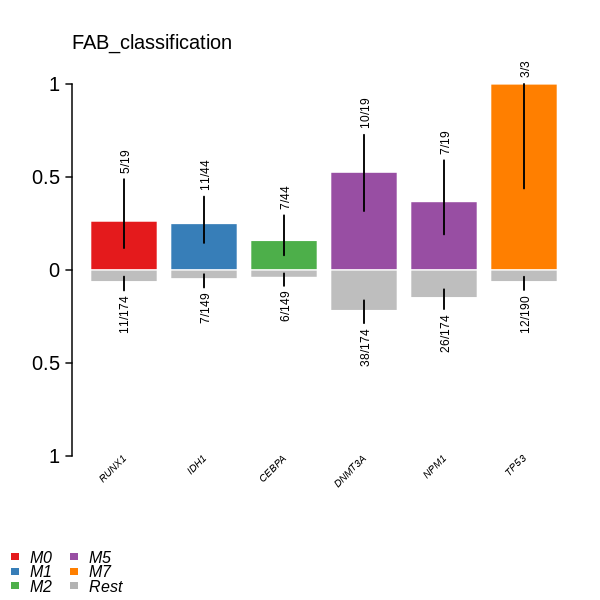

In [105]:
plotEnrichmentResults(enrich_res = fab.ce, pVal = 0.05, geneFontSize = 0.5, annoFontSize = 0.6)

### Somatic Interactions

Mutually exclusive or co-occurring set of genes can be detected using `somaticInteractions` function, which performs pair-wise Fisher's Exact test to detect such significant pair of genes.

gene1,gene2,pValue,oddsRatio,00,01,11,10,pAdj,Event,pair,event_ratio
<chr>,<chr>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<dbl>,<chr>,<chr>,<chr>
IDH2,RUNX1,0.0002809928,9.5908774,164,9,7,13,0.002341607,Co_Occurence,"IDH2, RUNX1",7/22
FLT3,NPM1,0.0009929836,3.7631606,125,16,17,35,0.007092740,Co_Occurence,"FLT3, NPM1",17/51
DNMT3A,NPM1,0.0014582861,3.7331407,128,17,16,32,0.009114288,Co_Occurence,"DNMT3A, NPM1",16/49
DNMT3A,IDH1,0.0033807043,4.4622015,137,8,10,38,0.018781690,Co_Occurence,"DNMT3A, IDH1",10/46
FLT3,TP53,0.0125113481,0.0000000,126,15,0,52,0.062556740,Mutually_Exclusive,"FLT3, TP53",0/67
NPM1,IDH2,0.0277733049,0.0000000,140,20,0,33,0.126242295,Mutually_Exclusive,"IDH2, NPM1",0/53
DNMT3A,FLT3,0.0630630121,1.9514757,111,34,18,30,0.246229181,Co_Occurence,"DNMT3A, FLT3",18/64
CEBPA,NRAS,0.0678045968,4.1492588,168,12,3,10,0.246229181,Co_Occurence,"CEBPA, NRAS",3/22
FLT3,RUNX1,0.0740850163,0.1656920,126,15,1,51,0.246229181,Mutually_Exclusive,"FLT3, RUNX1",1/66


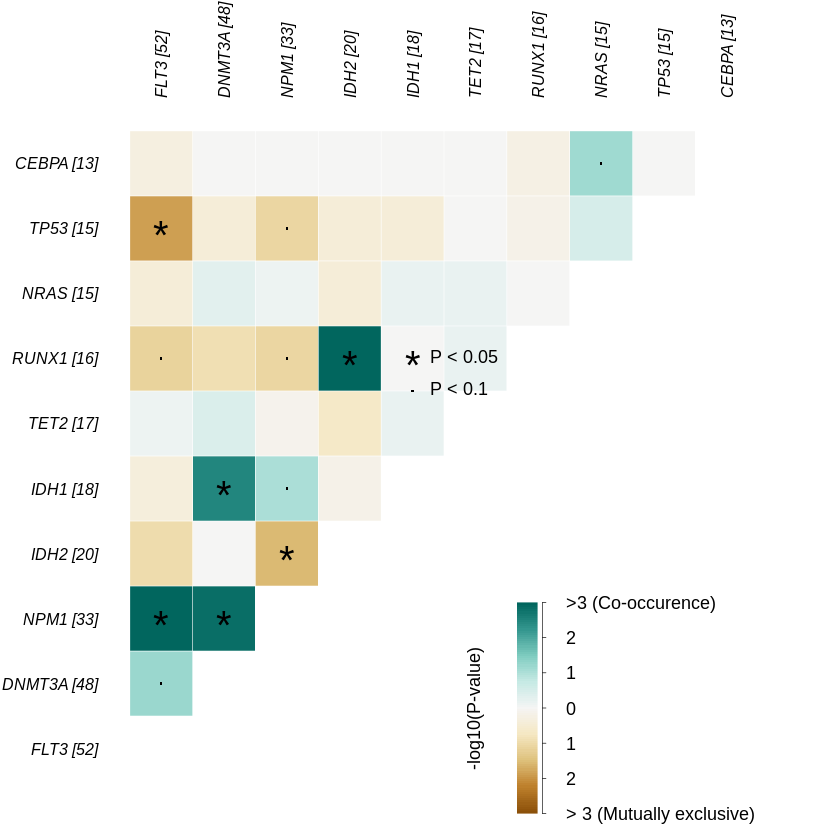

In [54]:
#exclusive/co-occurance event analysis on top 10 mutated genes.

options(repr.plot.width = 7, repr.plot.height = 7)
somaticInteractions(maf = laml, top = 10, pvalue = c(0.05, 0.1))

### Survival analysis

Survival analysis is an essential part of cohort based sequencing projects. Function `mafSurvive` performs survival analysis and draws kaplan meier curve by grouping samples based on mutation status of user defined gene(s) or manually provided samples those make up a group. This function requires input data to contain Tumor_Sample_Barcode (make sure they match to those in MAF file), binary event (1/0) and time to event.

Our annotation data already contains survival information and in case you have survival data stored in a separate table provide them via argument `clinicalData`


#### Mutation in any given genes


- binary event: overall_survival_status
- time to event: days to last followup

In [60]:
read.delim(laml.clin) %>% head(n=5)

,Tumor_Sample_Barcode,FAB_classification,days_to_last_followup,Overall_Survival_Status
,<chr>,<chr>,<dbl>,<int>
1,TCGA-AB-2802,M4,365,1
2,TCGA-AB-2803,M3,792,1
3,TCGA-AB-2804,M3,2557,0
4,TCGA-AB-2805,M0,577,1
5,TCGA-AB-2806,M1,945,1


Looking for clinical data in annoatation slot of MAF..

Number of mutated samples for given genes: 



DNMT3A 
    48 


Removed 11 samples with NA's

Median survival..



    Group medianTime     N
   <char>      <num> <int>
1: Mutant        245    45
2:     WT        396   137


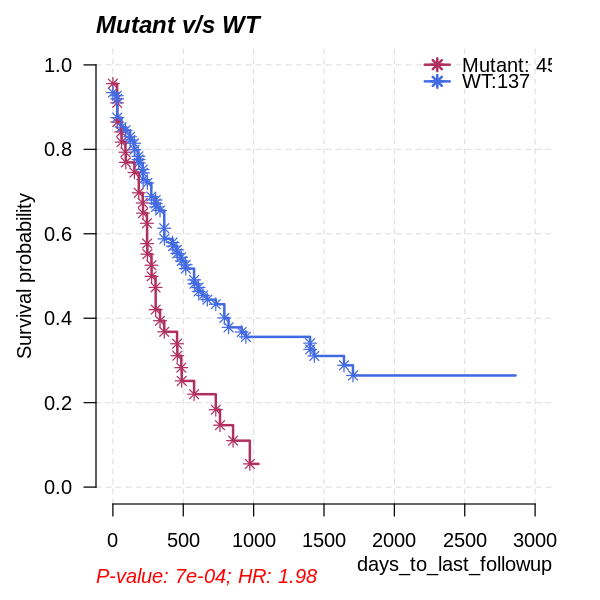

In [94]:
#Survival analysis based on grouping of DNMT3A mutation status
options(repr.plot.width = 5, repr.plot.height = 5)

mafSurvival(maf = laml,
  genes = 'DNMT3A',
  time = 'days_to_last_followup',
  Status = 'Overall_Survival_Status',
  isTCGA = TRUE)

In [86]:
subset(read.delim(laml.clin), days_to_last_followup == "-Inf") %>% head()

,Tumor_Sample_Barcode,FAB_classification,days_to_last_followup,Overall_Survival_Status
,<chr>,<chr>,<dbl>,<int>
85,TCGA-AB-2887,M1,-Inf,1
89,TCGA-AB-2891,M1,-Inf,1
104,TCGA-AB-2907,M0,-Inf,1
115,TCGA-AB-2918,M1,-Inf,1
118,TCGA-AB-2921,M4,-Inf,1
127,TCGA-AB-2930,M2,-Inf,1


#### Predict genesets associated with survival

- Identify set of genes which results in poor survival

- 두 유전자에 변이를 모두 갖는 사람들을 Mutant로 분류하는 방식임.

In [71]:
#Using top 10 mutated genes to identify a set of genes (of size 2) to predict poor prognostic groups
prog_geneset = survGroup(maf = laml,
  top = 10,
  geneSetSize = 2,
  time = "days_to_last_followup",
  Status = "Overall_Survival_Status",
  verbose = FALSE)

print(prog_geneset)

Removed 11 samples with NA's



    Gene_combination P_value    hr    WT Mutant
              <char>   <num> <num> <int>  <int>
 1:      FLT3_DNMT3A 0.00104 2.510   164     18
 2:      DNMT3A_NPM1 0.07190 1.720   166     16
 3:      DNMT3A_TET2 0.19600 1.780   176      6
 4:        FLT3_TET2 0.20700 1.860   177      5
 5:        NPM1_IDH1 0.21900 0.495   176      6
 6:      DNMT3A_IDH1 0.29300 1.500   173      9
 7:       IDH2_RUNX1 0.31800 1.580   176      6
 8:        FLT3_NPM1 0.53600 1.210   165     17
 9:      DNMT3A_IDH2 0.68000 0.747   178      4
10:      DNMT3A_NRAS 0.99200 0.986   178      4


Above results show a combination (N = 2) of genes which are associated with poor survival (P \< 0.05). We can draw KM curve for above results with the function `mafSurvGroup`


Looking for clinical data in annoatation slot of MAF..

Removed 11 samples with NA's

Median survival..



    Group medianTime     N
   <char>      <num> <int>
1: Mutant      242.5    18
2:     WT      379.5   164


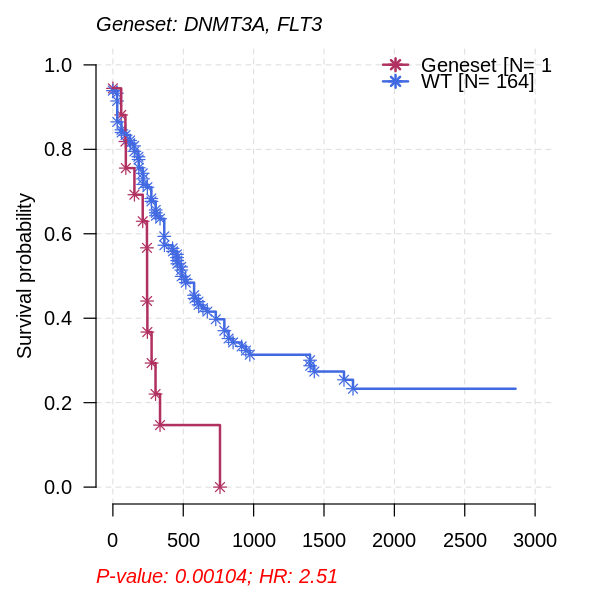

In [97]:
options(repr.plot.width = 5, repr.plot.height = 5)

mafSurvGroup(maf = laml,
  geneSet = c("DNMT3A", "FLT3"),
  time = "days_to_last_followup",
  Status = "Overall_Survival_Status")

### Comparing two cohorts (MAFs)

Cancers differ from each other in terms of their mutation pattern. We can compare two different cohorts to detect such differentially mutated genes. For example, recent article by [Madan et. al](http://www.ncbi.nlm.nih.gov/pubmed/27063598), have shown that patients with relapsed APL (Acute Promyelocytic Leukemia) tends to have mutations in PML and RARA genes, which were absent during primary stage of the disease. This difference between two cohorts (in this case primary and relapse APL) can be detected using function `mafComapre`, which performs fisher test on all genes between two cohorts to detect differentially mutated genes.


In [88]:
system("wget https://github.com/oghzzang/AMC_NGS1/raw/refs/heads/master/03_R/extdata/APL_primary.maf.gz")
system("wget https://github.com/oghzzang/AMC_NGS1/raw/refs/heads/master/03_R/extdata/APL_relapse.maf.gz")

In [98]:
#Primary APL MAF
primary.apl.maf = "APL_primary.maf.gz"
primary.apl = read.maf(maf = primary.apl.maf)

#Relapse APL MAF
relapse.apl.maf = "APL_relapse.maf.gz"
relapse.apl = read.maf(maf = relapse.apl.maf)

-Reading
-Validating
--Non MAF specific values in Variant_Classification column:
  ITD
-Silent variants: 45 
-Summarizing
-Processing clinical data
--Missing clinical data
-Finished in 0.161s elapsed (0.155s cpu) 
-Reading
-Validating
--Non MAF specific values in Variant_Classification column:
  ITD
-Silent variants: 19 
-Summarizing
-Processing clinical data
--Missing clinical data
-Finished in 0.138s elapsed (0.135s cpu) 


In [99]:
#Considering only genes which are mutated in at-least in 5 samples in one of the cohort to avoid bias due to genes mutated in single sample.
pt.vs.rt <- mafCompare(
  m1 = primary.apl,
  m2 = relapse.apl,
  m1Name = 'Primary',
  m2Name = 'Relapse',
  minMut = 5)
print(pt.vs.rt)

$results
   Hugo_Symbol Primary Relapse         pval         or       ci.up      ci.low
        <char>   <num>   <int>        <num>      <num>       <num>       <num>
1:         PML       1      11 1.529935e-05 0.03537381   0.2552937 0.000806034
2:        RARA       0       7 2.574810e-04 0.00000000   0.3006159 0.000000000
3:       RUNX1       1       5 1.310500e-02 0.08740567   0.8076265 0.001813280
4:        FLT3      26       4 1.812779e-02 3.56086275  14.7701728 1.149009169
5:      ARID1B       5       8 2.758396e-02 0.26480490   0.9698686 0.064804160
6:         WT1      20      14 2.229087e-01 0.60619329   1.4223101 0.263440988
7:        KRAS       6       1 4.334067e-01 2.88486293 135.5393108 0.337679367
8:        NRAS      15       4 4.353567e-01 1.85209500   8.0373994 0.553883512
9:      ARID1A       7       4 7.457274e-01 0.80869223   3.9297309 0.195710173
        adjPval
          <num>
1: 0.0001376942
2: 0.0011586643
3: 0.0393149868
4: 0.0407875250
5: 0.0496511201
6: 0.33436

#### Forest plots

Above results show two genes PML and RARA which are highly mutated in Relapse APL compared to Primary APL. We can visualize these results as a [forestplot](https://en.wikipedia.org/wiki/Forest_plot).

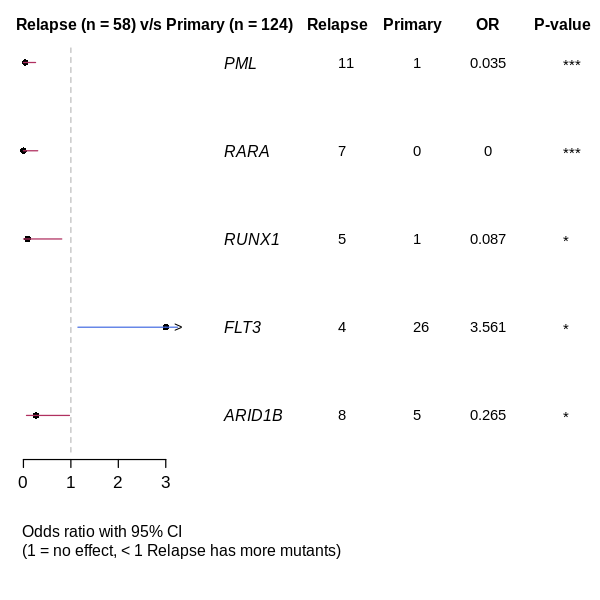

In [100]:
options(repr.plot.width = 5, repr.plot.height = 5)
forestPlot(mafCompareRes = pt.vs.rt, pVal = 0.1)

#### Co-onco plots

Another alternative way of displaying above results is by plotting two oncoplots side by side. `coOncoplot` function takes two maf objects and plots them side by side for better comparison.

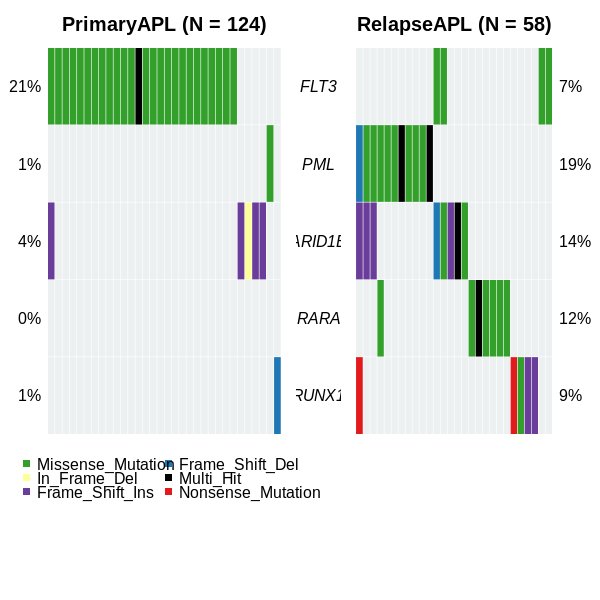

In [101]:
genes = c("PML", "RARA", "RUNX1", "ARID1B", "FLT3")

coOncoplot(
  m1 = primary.apl,
  m2 = relapse.apl,
  m1Name = 'PrimaryAPL',
  m2Name = 'RelapseAPL',
  genes = genes,
  removeNonMutated = TRUE
  )

#### Co-bar plots

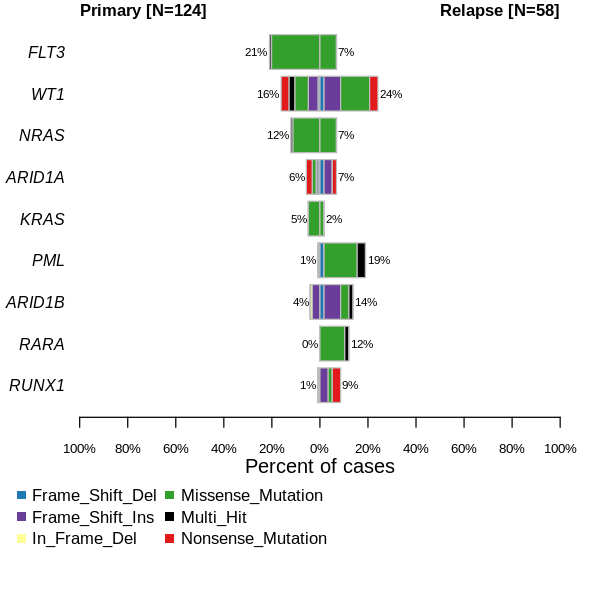

In [102]:
coBarplot(
  m1 = primary.apl,
  m2 = relapse.apl,
  m1Name = "Primary",
  m2Name = "Relapse"
  )

#### Lollipop plot-2

Along with plots showing cohort wise differences, its also possible to show gene wise differences with `lollipopPlot2` function.


Gene: PML

9 transcripts available. Use arguments refSeqID or proteinID to manually specify tx name.



     HGNC refseq.ID protein.ID aa.length
   <char>    <char>     <char>     <num>
1:    PML NM_002675  NP_002666       633
2:    PML NM_033238  NP_150241       882
3:    PML NM_033239  NP_150242       829
4:    PML NM_033240  NP_150243       611
5:    PML NM_033244  NP_150247       560
6:    PML NM_033246  NP_150249       423
7:    PML NM_033247  NP_150250       435
8:    PML NM_033249  NP_150252       585
9:    PML NM_033250  NP_150253       781


Using longer transcript NM_033238 for now.

9 transcripts available. Use arguments refSeqID or proteinID to manually specify tx name.



     HGNC refseq.ID protein.ID aa.length
   <char>    <char>     <char>     <num>
1:    PML NM_002675  NP_002666       633
2:    PML NM_033238  NP_150241       882
3:    PML NM_033239  NP_150242       829
4:    PML NM_033240  NP_150243       611
5:    PML NM_033244  NP_150247       560
6:    PML NM_033246  NP_150249       423
7:    PML NM_033247  NP_150250       435
8:    PML NM_033249  NP_150252       585
9:    PML NM_033250  NP_150253       781


Using longer transcript NM_033238 for now.



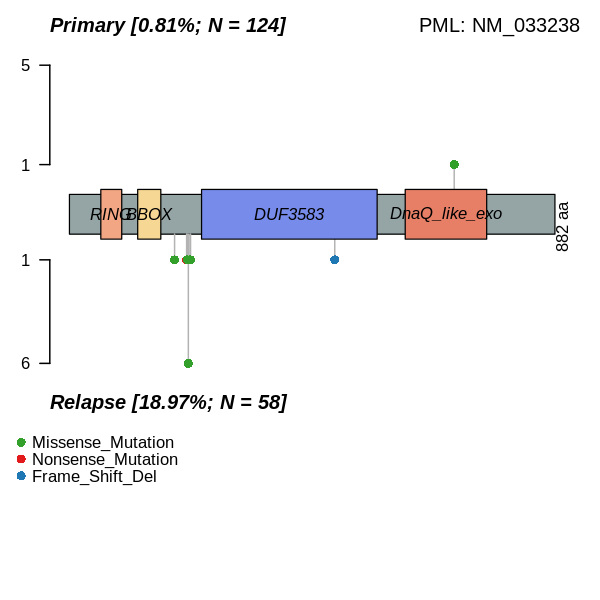

In [103]:
lollipopPlot2(
  m1 = primary.apl,
  m2 = relapse.apl,
  gene = "PML",
  AACol1 = "amino_acid_change",
  AACol2 = "amino_acid_change",
  m1_name = "Primary",
  m2_name = "Relapse")

### Oncogenic Signaling Pathways

`pathways` function checks for enrichment of known Oncogenic Signaling Pathways from TCGA cohorts.

Summarizing signalling pathways [Sanchez-Vega et al., https://doi.org/10.1016/j.cell.2018.03.035]



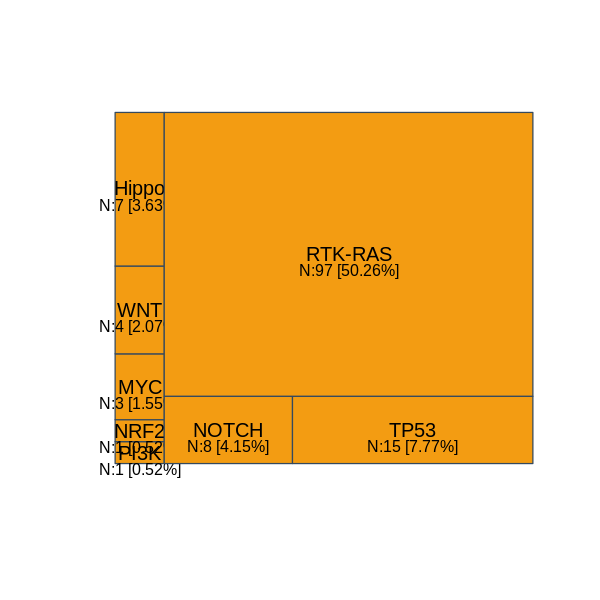

In [106]:
pws = pathways(maf = laml, plotType = 'treemap')

Its also possible to visualize the results

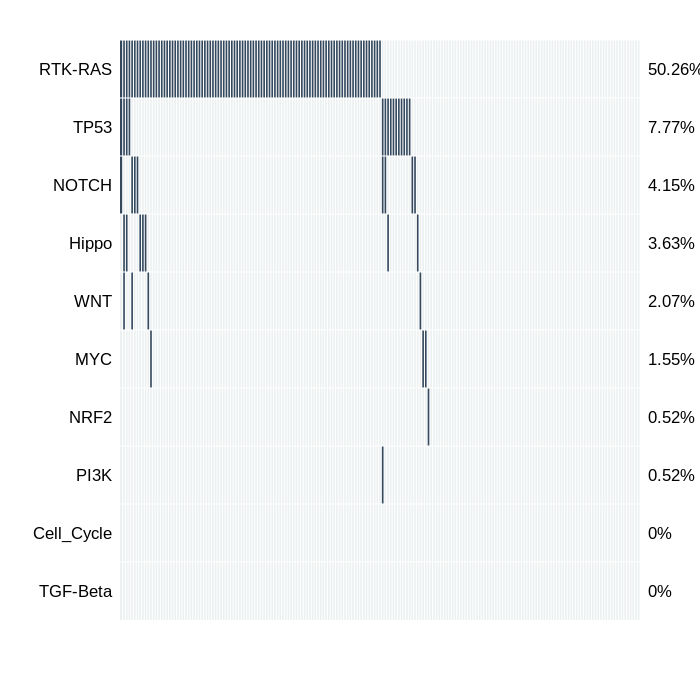

In [ ]:
plotPathways(maf = laml, pathlist = pws)

### Tumor heterogeneity and MATH scores

#### Heterogeneity in tumor samples

Tumors are generally heterogeneous i.e, consist of multiple clones. This heterogeneity can be inferred by clustering variant allele frequencies. `inferHeterogeneity` function uses vaf information to cluster variants (using `mclust`), to infer clonality. By default, `inferHeterogeneity` function looks for column *t_vaf* containing vaf information. However, if the field name is different from *t_vaf*, we can manually specify it using argument `vafCol`. For example, in this case study vaf is stored under the field name *i_TumorVAF_WU*.


In [111]:
install.packages("mclust")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Package 'mclust' version 6.1.1
Type 'citation("mclust")' for citing this R package in publications.

Processing TCGA-AB-2972..



   Tumor_Sample_Barcode cluster   meanVaf
                 <fctr>  <char>     <num>
1:         TCGA-AB-2972       2 0.4496571
2:         TCGA-AB-2972       1 0.2454750
3:         TCGA-AB-2972 outlier 0.3695000


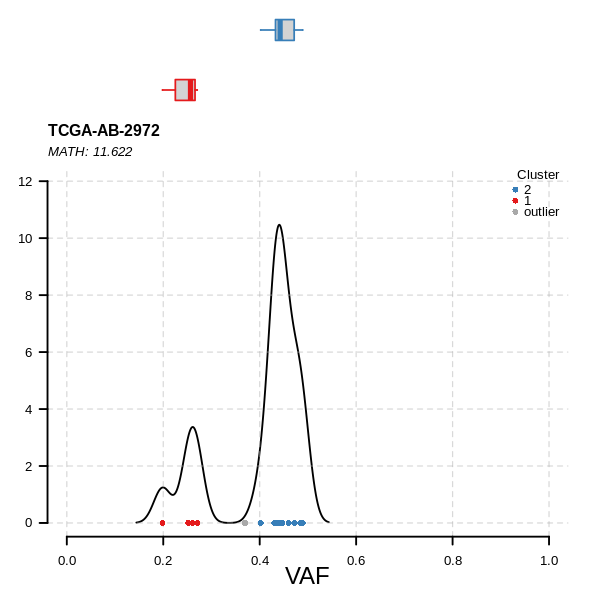

In [112]:
#Heterogeneity in sample TCGA.AB.2972
library("mclust")

tcga.ab.2972.het = inferHeterogeneity(maf = laml, tsb = 'TCGA-AB-2972', vafCol = 'i_TumorVAF_WU')
print(tcga.ab.2972.het$clusterMeans)
#Visualizing results
plotClusters(clusters = tcga.ab.2972.het)

Above figure shows clear separation of two clones clustered at mean variant allele frequencies of \~45% (major clone) and another minor clone at variant allele frequency of \~25%.

Although clustering of variant allele frequencies gives us a fair idea on heterogeneity, it is also possible to measure the extent of heterogeneity in terms of a numerical value. MATH score (mentioned as a subtitle in above plot) is a simple quantitative measure of intra-tumor heterogeneity, which calculates the width of the vaf distribution. Higher MATH scores are found to be associated with poor outcome. MATH score can also be used a proxy variable for survival analysis.


### Mutational Signatures


(설명 전 아래 패키지 먼저 설치)

In [126]:
install.packages('NMF')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)




모든 암은 진행되면서 특정한 nucleotid substitution 패턴으로 특징지어지는 시그니처를 남깁니다. [Alexandrov et.al](http://www.nature.com/nature/journal/v500/n7463/full/nature12477.html)은 7000개 이상의 cancer sample 샘플에서 유래된 이러한 돌연변이 시그니처를 연구를 통해 확인했습니다. 이러한 signatures는 mutated base를 둘러싼 인접한 bases를 기준으로 분류된 96개의 substitution classes로 구성된 nucleotide substitution matrix를 분해하여 얻을 수 있습니다. 추출된 시그니처는 validated signatures와 비교할 수도 있습니다.

시그니처 분석은 다음 단계들을 따릅니다.

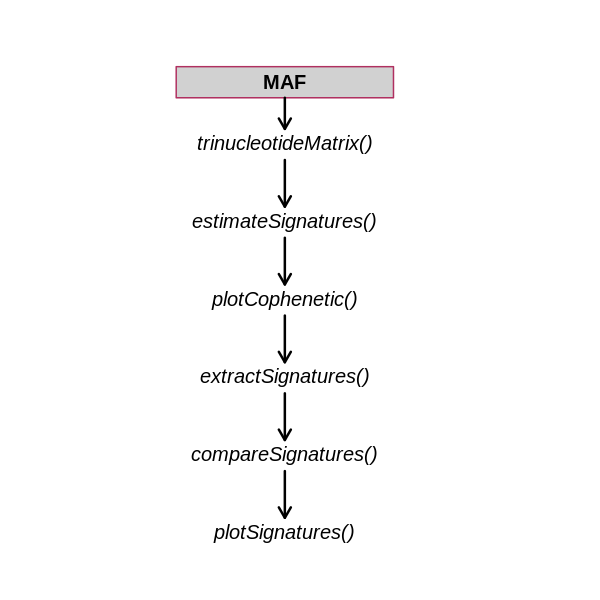

1.  `estimateSignatures` - which runs NMF on a range of values and measures the goodness of fit - in terms of [Cophenetic correlation](https://en.wikipedia.org/wiki/Cophenetic_correlation).
2.  `plotCophenetic` - which draws an elblow plot and helps you to decide optimal number of signatures. Best possible signature is the value at which Cophenetic correlation drops significantly.
3.  `extractSignatures` - uses non-negative matrix factorization to decompose the matrix into `n` signatures. `n` is chosen based on the above two steps. In case if you already have a good estimate of `n`, you can skip above two steps.
4.  `compareSignatures` - extracted signatures from above step can be compared to known signatures[11](#references) from [COSMIC](https://cancer.sanger.ac.uk/cosmic/signatures/SBS/) database, and cosine similarity is calculated to identify best match.
5.  `plotSignatures` - plots signatures

***NOTE:***

1.  Should you receive an error while running `extractSignatures` complaining `none of the packages are loaded`, please manually load the `NMF` library and re-run.

2.  If either `extractSignatures` or `estimateSignatures` stops in between, its possibly due to low mutation counts in the matrix. In that case rerun the functions with `pConstant` argument set to small positive value (e.g, 0.1).


#### Prepares a mutational matrix for signature analysis.

signature analysis 의 첫 번째 단계는 mutated bases 를 둘러싼 adacent base들을 얻고 돌연변이 행렬을 만드는 것입니다. 이전 버전의 maftools는 입력으로 fasta 파일을 필요로 했으나, 1.8.0 버전부터는 BSgenome 객체를 사용해서 더 빠르게 서열을 추출할 수 있게 되었습니다.

다만 패키지 설치에 시간이 오래 걸려서 (~14m) 본 실습장에서는 진행하지 않습니다. 미리 만들어놓은 파일을 불러와서 사용하겠습니다.

In [ ]:
# 실습장에서 진행하지 않음.
# runtime: 14m
# BiocManager::install("BSgenome.Hsapiens.UCSC.hg19")

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.rstudio.com

Bioconductor version 3.21 (BiocManager 1.30.26), R 4.5.1 (2025-06-13)

Installing package(s) 'BSgenome.Hsapiens.UCSC.hg19'

also installing the dependencies ‘SparseArray’, ‘formatR’, ‘MatrixGenerics’, ‘Biobase’, ‘S4Arrays’, ‘DelayedArray’, ‘lambda.r’, ‘futile.options’, ‘SummarizedExperiment’, ‘rjson’, ‘futile.logger’, ‘snow’, ‘BH’, ‘UCSC.utils’, ‘GenomeInfoDbData’, ‘XML’, ‘GenomicAlignments’, ‘restfulr’, ‘BiocParallel’, ‘BiocGenerics’, ‘S4Vectors’, ‘IRanges’, ‘GenomeInfoDb’, ‘GenomicRanges’, ‘Biostrings’, ‘BiocIO’, ‘rtracklayer’, ‘matrixStats’, ‘XVector’, ‘Rsamtools’, ‘BSgenome’


Old packages: 'later', 'xml2'



In [115]:
# 실습장에서 진행하지 않음.
# library("BSgenome.Hsapiens.UCSC.hg19", quietly = TRUE)


Attaching package: ‘generics’


The following object is masked from ‘package:dplyr’:

    explain


The following objects are masked from ‘package:base’:

    as.difftime, as.factor, as.ordered, intersect, is.element, setdiff,
    setequal, union



Attaching package: ‘BiocGenerics’


The following object is masked from ‘package:dplyr’:

    combine


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, saveRDS, table, tapply, unique,
    unsplit, which.max, which.min



Attaching package: ‘S4Vectors’


The following objects are masked from ‘package:dplyr’:

    first, rename


The following ob

In [119]:
# 실습장에서 진행하지 않음.
# laml.tnm = trinucleotideMatrix(
#   maf = laml,
#   prefix = 'chr',
#   add = TRUE,
#   ref_genome = "BSgenome.Hsapiens.UCSC.hg19"
#   )

# saveRDS(laml.tnm, "laml.tnm.rds")

Warning message in trinucleotideMatrix(maf = laml, prefix = "chr", add = TRUE, ref_genome = "BSgenome.Hsapiens.UCSC.hg19"):
“Chromosome names in MAF must match chromosome names in reference genome.
Ignorinig 101 single nucleotide variants from missing chromosomes chr23”


-Extracting 5' and 3' adjacent bases
-Extracting +/- 20bp around mutated bases for background C>T estimation
-Estimating APOBEC enrichment scores
--Performing one-way Fisher's test for APOBEC enrichment
---APOBEC related mutations are enriched in  3.315 % of samples (APOBEC enrichment score > 2 ;  6  of  181  samples)
-Creating mutation matrix
--matrix of dimension 188x96

In [121]:
system("wget https://github.com/oghzzang/AMC_NGS1/raw/refs/heads/master/03_R/extdata/laml.tnm.rds")

In [129]:
laml.tnm <- readRDS("laml.tnm.rds")

####

In [133]:
options(repr.plot.width = 10, repr.plot.height = 5)

-Running NMF for 6 ranks
Compute NMF rank= 2  ... + measures ... OK
Compute NMF rank= 3  ... + measures ... OK
Compute NMF rank= 4  ... + measures ... OK
Compute NMF rank= 5  ... + measures ... OK
Compute NMF rank= 6  ... + measures ... OK
-created nmf_consensus.png
-Finished in 00:03:22 elapsed (55.9s cpu) 


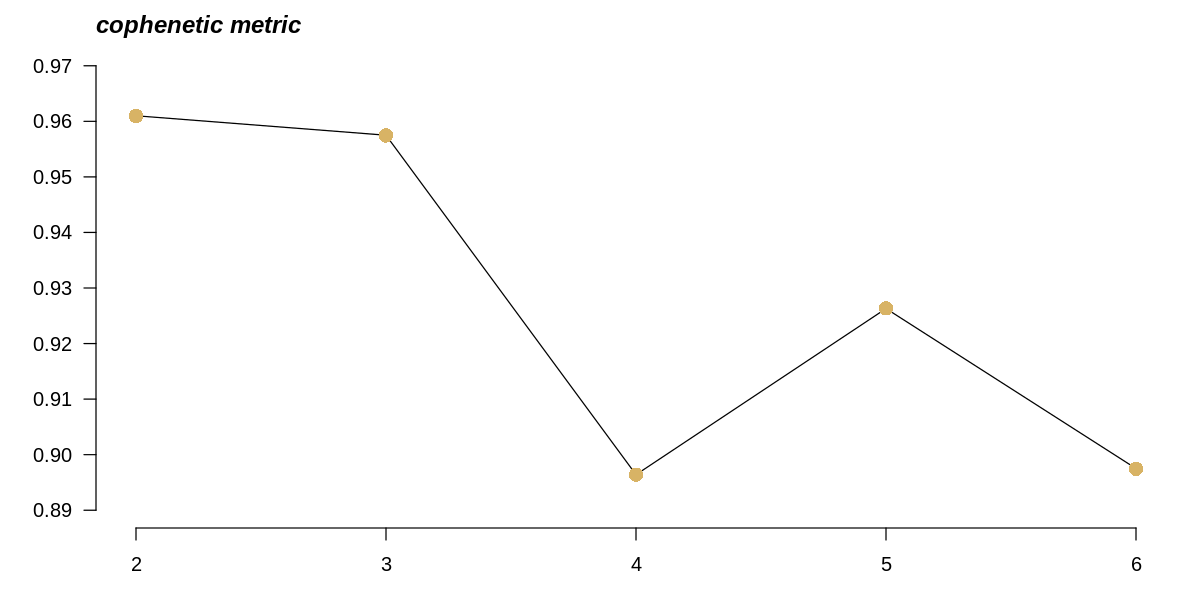

In [135]:
#Run main function with maximum 6 signatures.
library(NMF)

laml.sign = estimateSignatures(mat = laml.tnm,
  nTry = 6,
  pConstant = 0.1,
  plotBestFitRes = TRUE,
  parallel = 2)

# nTry: Maximum number of signatures to try.
# pConstant: A small positive value to add to the matrix. Use it ONLY if the functions throws an non-conformable arrays error
# plotBestFitRes: plots consensus heatmap for range of values tried.
# parallel: Number of cores to use.

Draw elbow plot to visualize and decide optimal number of signatures from above results.

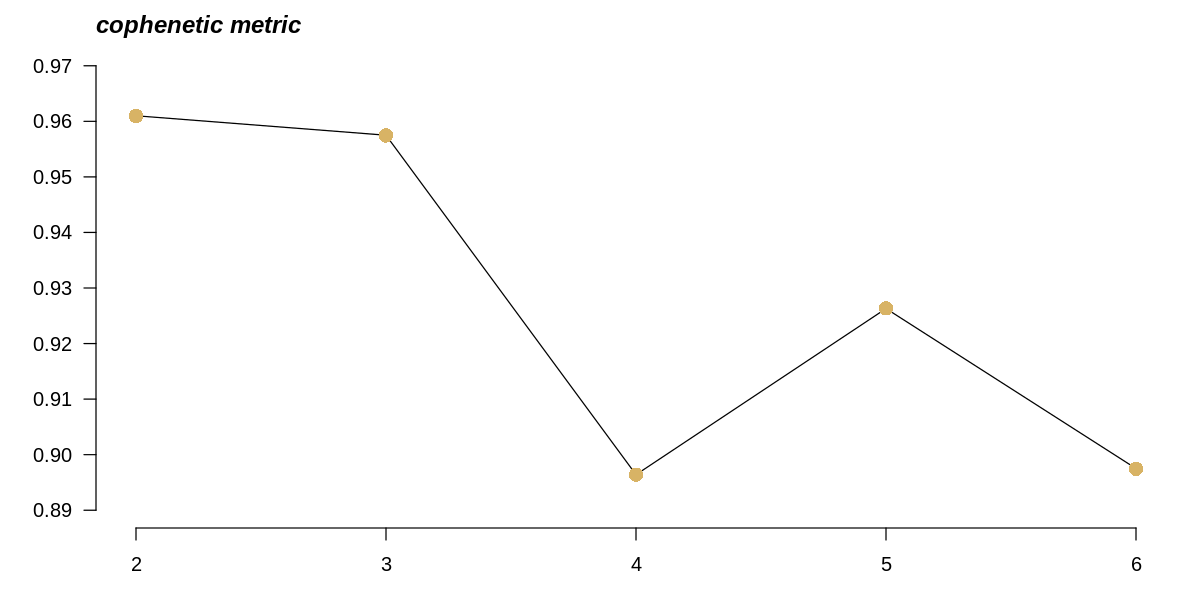

In [132]:
plotCophenetic(res = laml.sign)

최적의 값은 y축의 상관 값이 크게 떨어지는 지점입니다. 이 경우에는 n = 3에서 나타나는 것 같아요. LAML은 mutation rate가 낮은 편이라서 mutational signature 분석에 아주 적합하지는 않음. mutational burden이 더 높은 solid tumor에서 샘플 수가 충분하다면 더 많은 mutational signature를 찾을 수 있음.

n이 추정되면, main function들을 실행할 수 있습니다.

In [136]:
laml.sig = extractSignatures(mat = laml.tnm, n = 3)

-Running NMF for factorization rank: 3



ERROR: Error in cons != .consold: non-conformable arrays


Timing stopped at: 0.157 0 0.157



In [137]:
laml.sig = extractSignatures(
  mat = laml.tnm,
  n = 3,
  pConstant = 0.1,
  parallel = 2
  )

-Running NMF for factorization rank: 3

-Finished in3.079s elapsed (2.971s cpu)



Compare detected signatures to COSMIC [Legacy](https://cancer.sanger.ac.uk/cosmic/signatures_v2) or [SBS](https://cancer.sanger.ac.uk/cosmic/signatures_v2) signature database.


In [138]:
#Compate against original 30 signatures
laml.og30.cosm = compareSignatures(nmfRes = laml.sig, sig_db = "legacy")

#Compate against updated version3 60 signatures
laml.v3.cosm = compareSignatures(nmfRes = laml.sig, sig_db = "SBS")

-Comparing against COSMIC signatures

------------------------------------

--Found Signature_1 most similar to COSMIC_1

   Aetiology: spontaneous deamination of 5-methylcytosine [cosine-similarity: 0.84]

--Found Signature_2 most similar to COSMIC_1

   Aetiology: spontaneous deamination of 5-methylcytosine [cosine-similarity: 0.577]

--Found Signature_3 most similar to COSMIC_5

   Aetiology: Unknown [cosine-similarity: 0.851]

------------------------------------

-Comparing against COSMIC signatures

------------------------------------

--Found Signature_1 most similar to SBS1

   Aetiology: spontaneous or enzymatic deamination of 5-methylcytosine [cosine-similarity: 0.858]

--Found Signature_2 most similar to SBS6

   Aetiology: defective DNA mismatch repair [cosine-similarity: 0.538]

--Found Signature_3 most similar to SBS3

   Aetiology: Defects in DNA-DSB repair by HR [cosine-similarity: 0.836]

------------------------------------



`compareSignatures` returns full table of cosine similarities against COSMIC signatures, which can be further analysed. Below plot shows comparison of similarities of detected signatures against validated signatures.


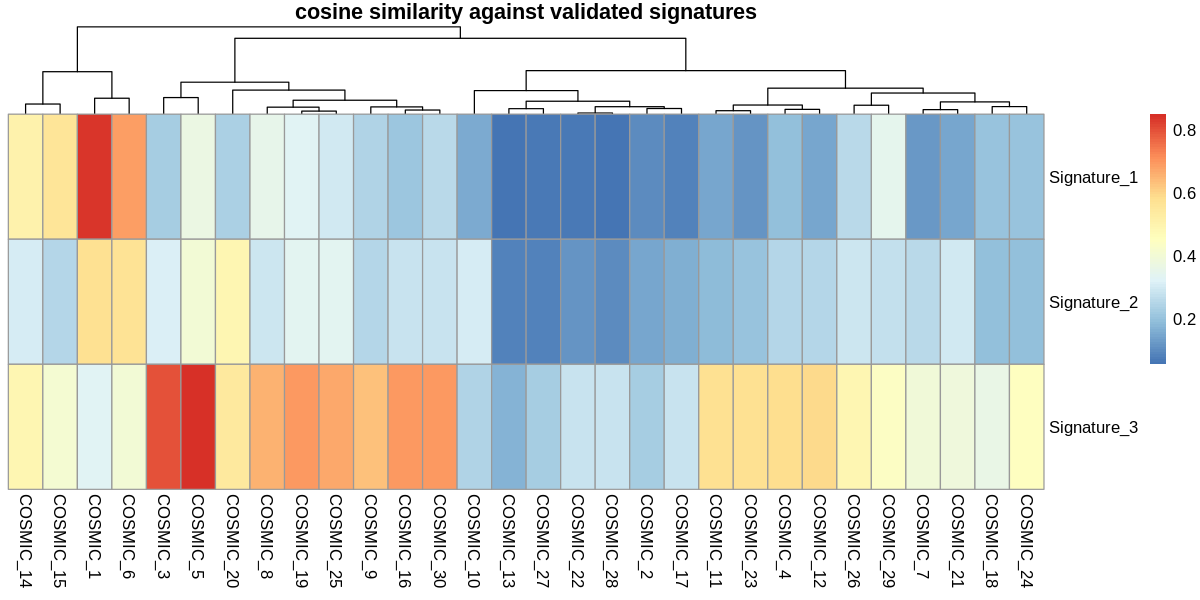

In [139]:
pheatmap(mat = laml.og30.cosm$cosine_similarities, cluster_rows = FALSE, main = "cosine similarity against validated signatures")

Finally plot signatures


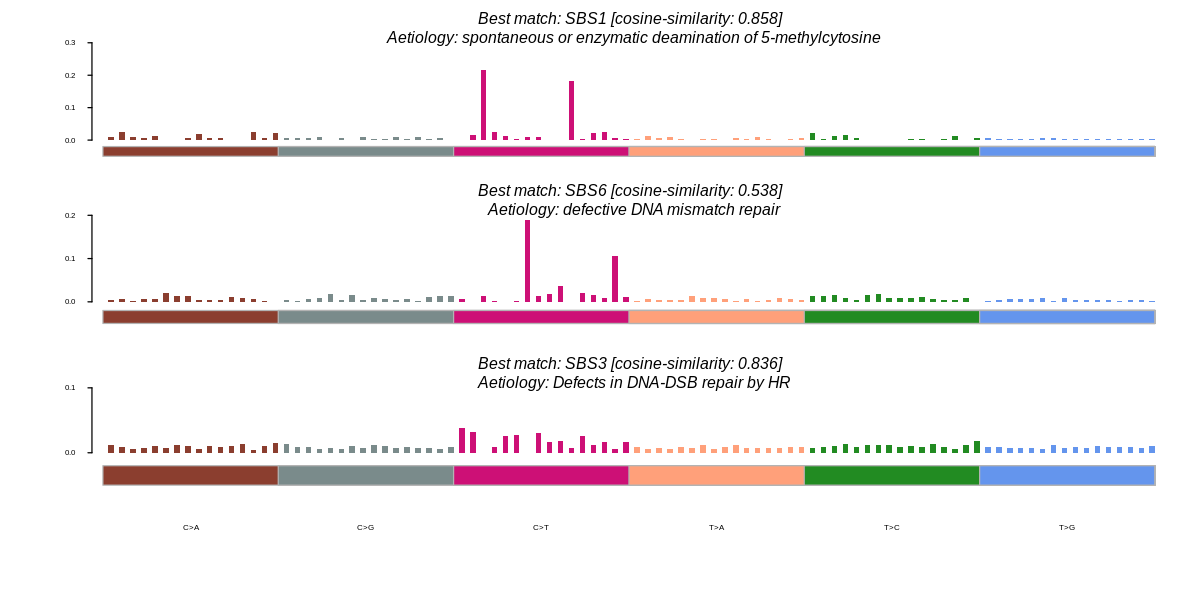

In [140]:
maftools::plotSignatures(nmfRes = laml.sig, title_size = 1.2, sig_db = "SBS")

## Set operations


### Subsetting MAF

We can also subset MAF using function `subsetMaf`

In [ ]:
#Extract data for samples 'TCGA.AB.3009' and 'TCGA.AB.2933'  (Printing just 5 rows for display convenience)
subsetMaf(maf = laml, tsb = c('TCGA-AB-3009', 'TCGA-AB-2933'), mafObj = FALSE)[1:5]
##Same as above but return output as an MAF object (Default behaviour)
subsetMaf(maf = laml, tsb = c('TCGA-AB-3009', 'TCGA-AB-2933'))

#### Specifying queries and controlling output fields.

In [ ]:
#Select all Splice_Site mutations from DNMT3A and NPM1
subsetMaf(maf = laml, genes = c('DNMT3A', 'NPM1'), mafObj = FALSE,query = "Variant_Classification == 'Splice_Site'")

#Same as above but include only 'i_transcript_name' column in the output
subsetMaf(maf = laml, genes = c('DNMT3A', 'NPM1'), mafObj = FALSE, query = "Variant_Classification == 'Splice_Site'", fields = 'i_transcript_name')


#### Subsetting by clinical data

Use `clinQuery` argument in `subsetMaf` to select samples of interest based on their clinical features.


In [ ]:
#Select all samples with FAB clasification M4 in clinical data
laml_m4 = subsetMaf(maf = laml, clinQuery = "FAB_classification %in% 'M4'")

# **Public data 를 이용하여 분석**

### public data 다운받아서 분석하기

#### 데이터 다운로드

문제: TCGA Liver cancer 환자들의 mutation pattern을 확인하고 싶음.

tcga dataset: https://xenabrowser.net/datapages/?hub=https://tcga.xenahubs.net:443

In [188]:
system("wget https://tcga-xena-hub.s3.us-east-1.amazonaws.com/download/mc3%2FLIHC_mc3.txt.gz")

In [350]:
lihc.maf <- read.delim("mc3%2FLIHC_mc3.txt.gz", sep = "\t")

#### maftools 필수 컬럼 확인

In [352]:
head(lihc.maf, n=5)

,sample,chr,start,end,reference,alt,gene,effect,Amino_Acid_Change,DNA_VAF,SIFT,PolyPhen
,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>
1,TCGA-2V-A95S-01,10,131761669,131761669,C,T,EBF3,Missense_Mutation,p.E85K,0.40,deleterious(0.01),probably_damaging(0.984)
2,TCGA-2V-A95S-01,10,1405746,1405746,G,A,ADARB2,Missense_Mutation,p.A185V,0.24,deleterious(0.01),probably_damaging(0.999)
3,TCGA-2V-A95S-01,10,43869118,43869118,G,T,FXYD4,5'UTR,,0.26,,
4,TCGA-2V-A95S-01,10,55581514,55581514,T,A,PCDH15,3'UTR,,0.29,,
5,TCGA-2V-A95S-01,10,75561253,75561253,C,T,ZSWIM8,Silent,p.L1835L,0.21,,


In [353]:
colnames(lihc.maf)

[1] "sample"            "chr"               "start"            
 [4] "end"               "reference"         "alt"              
 [7] "gene"              "effect"            "Amino_Acid_Change"
[10] "DNA_VAF"           "SIFT"              "PolyPhen"

In [360]:
lihc.maf <- lihc.maf %>%
  mutate(Tumor_Sample_Barcode   = sample,
         Chromosome             = chr,
         Hugo_Symbol            = gene,
         NCBI_Build             = 'GRCh37',
         Start_Position         = start,
         End_Position           = end,
         Reference_Allele       = reference,
         Tumor_Seq_Allele2      = alt,
         Variant_Classification = effect,
         Variant_Type           = "not-defined")

In [361]:
lihc <- read.maf(lihc.maf)

-Validating
--Non MAF specific values in Variant_Classification column:
  large deletion
--Non MAF specific values in Variant_Type column:
  not-defined
-Silent variants: 20898 
-Summarizing
--Possible FLAGS among top ten genes:
  TTN
  MUC16
  OBSCN
-Processing clinical data
--Missing clinical data
-Finished in 2.628s elapsed (2.626s cpu) 


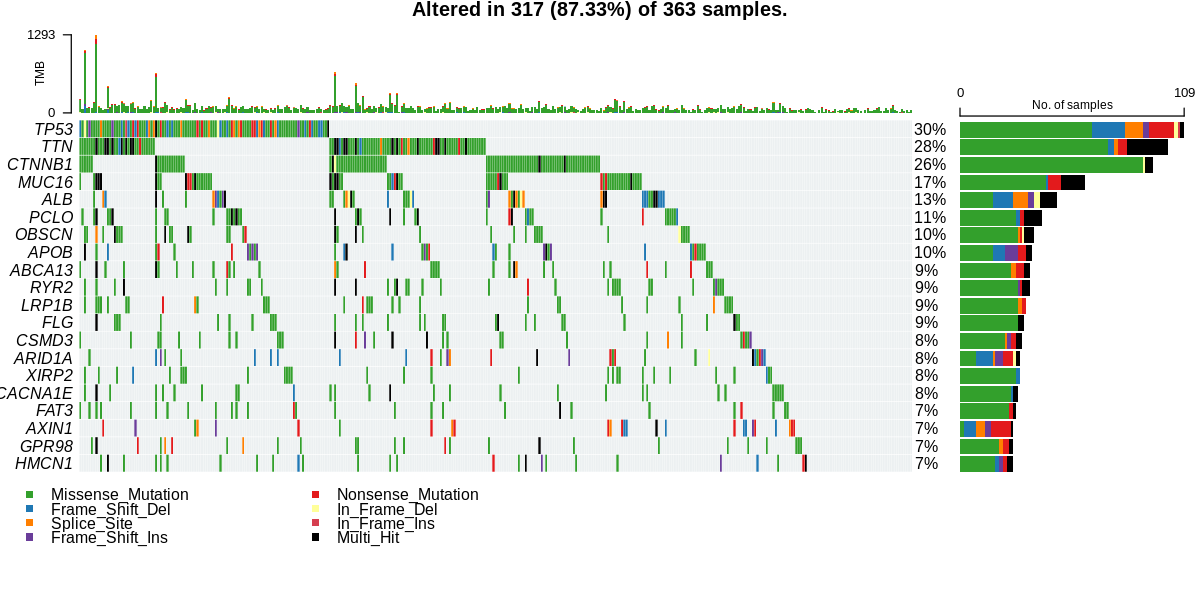

In [363]:
options(repr.plot.width = 10, repr.plot.height = 5)
oncoplot(lihc)

#### 임상정보 추가하기

In [187]:
system("wget https://tcga-xena-hub.s3.us-east-1.amazonaws.com/download/survival%2FLIHC_survival.txt")

In [275]:
laml.clin <- read.delim("survival%2FLIHC_survival.txt")

In [276]:
laml.clin <-  mutate(laml.clin, Tumor_Sample_Barcode = sample)

In [291]:
laml.clin$OS.month <- laml.clin$OS.time / 365 * 12

In [364]:
head(laml.clin)

,sample,X_PATIENT,OS,OS.time,DSS,DSS.time,DFI,DFI.time,PFI,PFI.time,Redaction,Tumor_Sample_Barcode,OS.month
,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>,<chr>,<dbl>
1,TCGA-2V-A95S-01,TCGA-2V-A95S,0,NA,0,NA,0,NA,0,NA,,TCGA-2V-A95S-01,NA
2,TCGA-2Y-A9GS-01,TCGA-2Y-A9GS,1,724,1,724,1,102,1,102,,TCGA-2Y-A9GS-01,23.80274
3,TCGA-2Y-A9GT-01,TCGA-2Y-A9GT,1,1624,1,1624,1,1083,1,1083,,TCGA-2Y-A9GT-01,53.39178
4,TCGA-2Y-A9GU-01,TCGA-2Y-A9GU,0,1939,0,1939,0,1939,0,1939,,TCGA-2Y-A9GU-01,63.74795
5,TCGA-2Y-A9GV-01,TCGA-2Y-A9GV,1,2532,1,2532,0,2532,1,1745,,TCGA-2Y-A9GV-01,83.24384
6,TCGA-2Y-A9GW-01,TCGA-2Y-A9GW,1,1271,1,1271,1,1229,1,1229,,TCGA-2Y-A9GW-01,41.78630


In [365]:
lihc <- read.maf(lihc.maf, clinicalData = laml.clin)

-Validating
--Non MAF specific values in Variant_Classification column:
  large deletion
--Non MAF specific values in Variant_Type column:
  not-defined
-Silent variants: 20898 
-Summarizing
--Possible FLAGS among top ten genes:
  TTN
  MUC16
  OBSCN
-Processing clinical data
-Finished in 3.369s elapsed (3.304s cpu) 


#### Overall survival에 영향을 미치는 mutated gene 찾기

In [366]:
survGroup(maf = lihc,
  top = 15,
  geneSetSize = 1,
  time = "OS.month",
  Status = "OS",
  verbose = FALSE)

Removed 1 samples with NA's



Gene_combination,P_value,hr,WT,Mutant
<chr>,<dbl>,<dbl>,<int>,<int>
LRP1B,0.0152,1.940,330,32
ARID1A,0.0320,1.830,334,28
TP53,0.0567,1.450,253,109
APOB,0.0652,1.660,327,35
PCLO,0.0951,1.530,322,40
MUC16,0.2950,1.280,301,61
RYR2,0.3430,1.310,329,33
OBSCN,0.4030,1.260,326,36
ALB,0.4060,0.784,316,46


Looking for clinical data in annoatation slot of MAF..

Number of mutated samples for given genes: 



LRP1B 
   32 


Removed 1 samples with NA's

Median survival..



    Group medianTime     N
   <char>      <num> <int>
1: Mutant   15.89589    32
2:     WT   20.05479   330


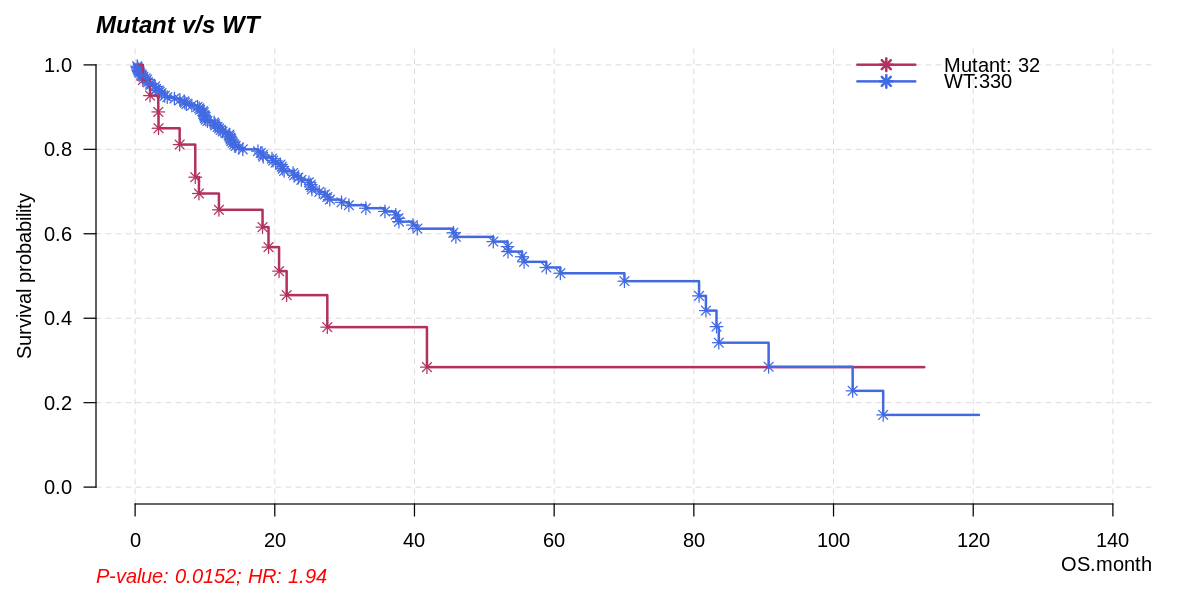

In [367]:
mafSurvival(
  maf    = lihc,
  genes  = 'LRP1B',
  time   = 'OS.month',
  Status = 'OS')

#### Compare MAF files

- tumor_sample_barcodes 추출하기

In [313]:
all_tsb <- lihc@variants.per.sample$Tumor_Sample_Barcode

In [307]:
mut_tsb <- genesToBarcodes(lihc, genes = "LRP1B", justNames = TRUE, verbose = TRUE)$LRP1B

In [314]:
wt_tsb  <- all_tsb[!all_tsb %in% mut_tsb]

- subset maf

In [309]:
lihc_mut <- subsetMaf(lihc, tsb = mut_tsb)

--Possible FLAGS among top ten genes:
  TTN
  MUC16
  NEB
  OBSCN
-Processing clinical data


In [318]:
lihc_wt <- subsetMaf(lihc, tsb = wt_tsb)

--Possible FLAGS among top ten genes:
  TTN
  MUC16
  OBSCN
-Processing clinical data


Warning message in FUN(X[[i]], ...):
“Removed 0 samples with zero mutations.”
Warning message in FUN(X[[i]], ...):
“Removed 0 samples with zero mutations.”
Performing pairwise t-test for differences in mutation burden..



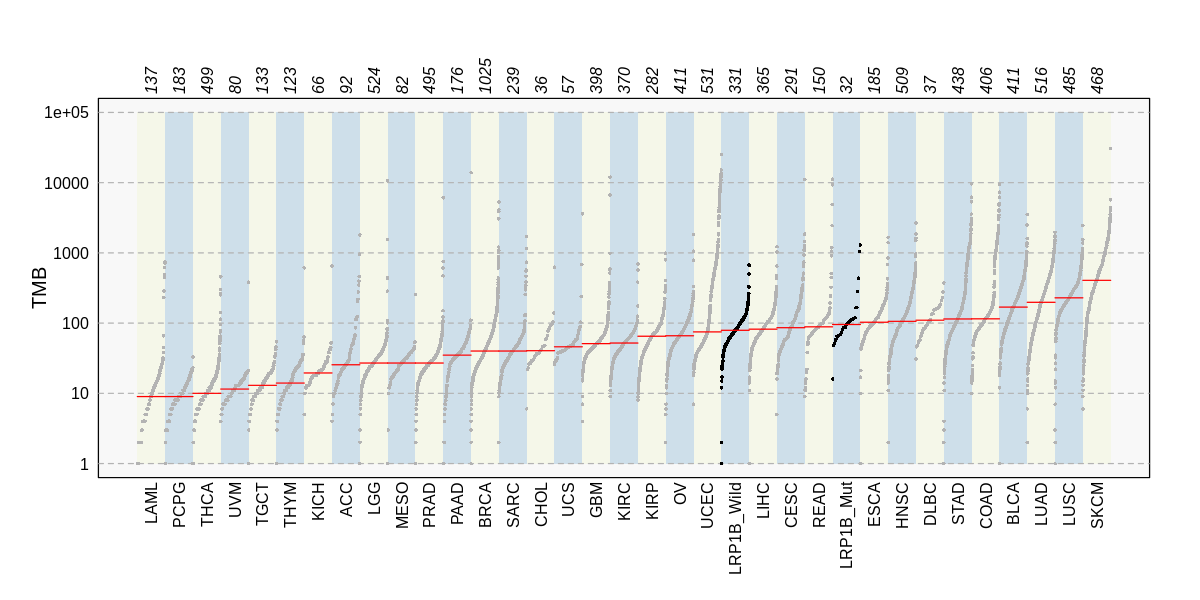

In [341]:
options(repr.plot.width = 10, repr.plot.height = 5)
lihc.mutload = tcgaCompare(
  maf = list(lihc_mut, lihc_wt),
  cohortName = c('LRP1B_Mut', 'LRP1B_Wild'))

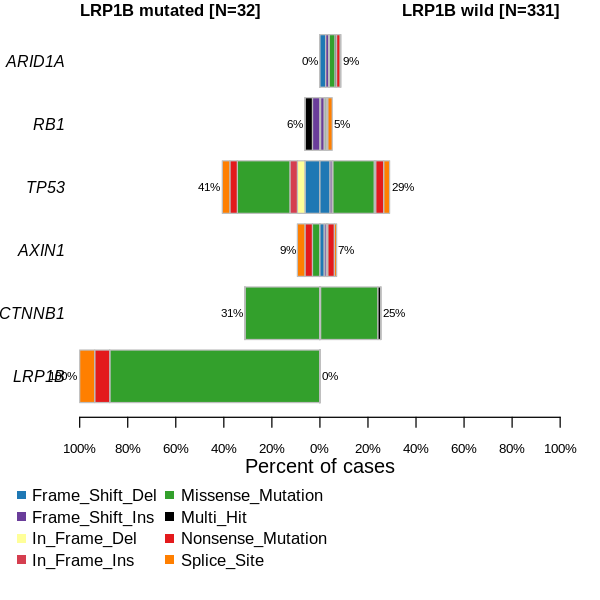

In [344]:
options(repr.plot.width = 5, repr.plot.height = 5)

genes = c("LRP1B", "CTNNB1", "AXIN1", "TP53", "RB1", "ARID1A")
coBarplot(
  m1 = lihc_mut,
  m2 = lihc_wt,
  m1Name = "LRP1B mutated",
  m2Name = "LRP1B wild",
  genes = genes,
  )

### cbioportal에서 추가 validation 해보기

ppt

# 파일 저장

In [369]:
# 터미널에서 실행
# cd /content
# tar -zcvf 03_R_completed.tar.gz 03_R